In [32]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import scipy.interpolate as si
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

#### Code 4.1

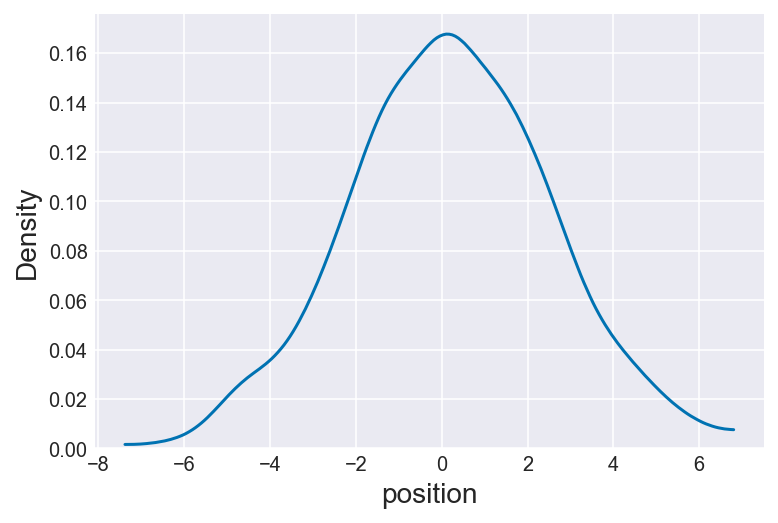

In [2]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
pm.kdeplot(pos)
plt.xlabel('position', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 4.2 and 4.3

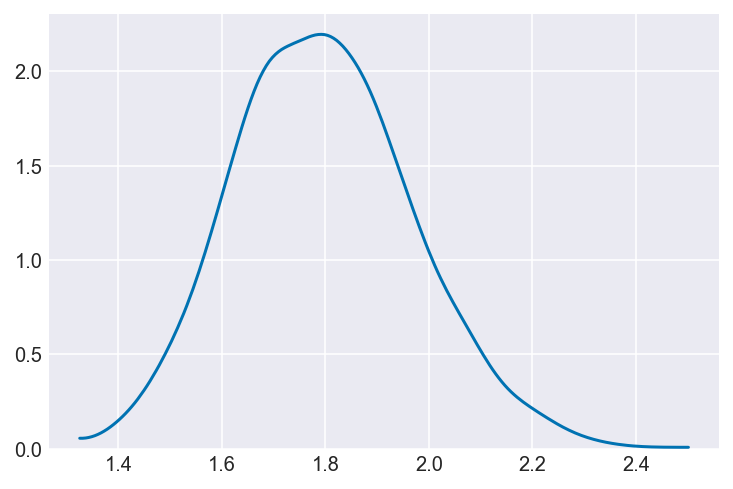

In [3]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
pm.kdeplot(pos);

#### Code 4.4

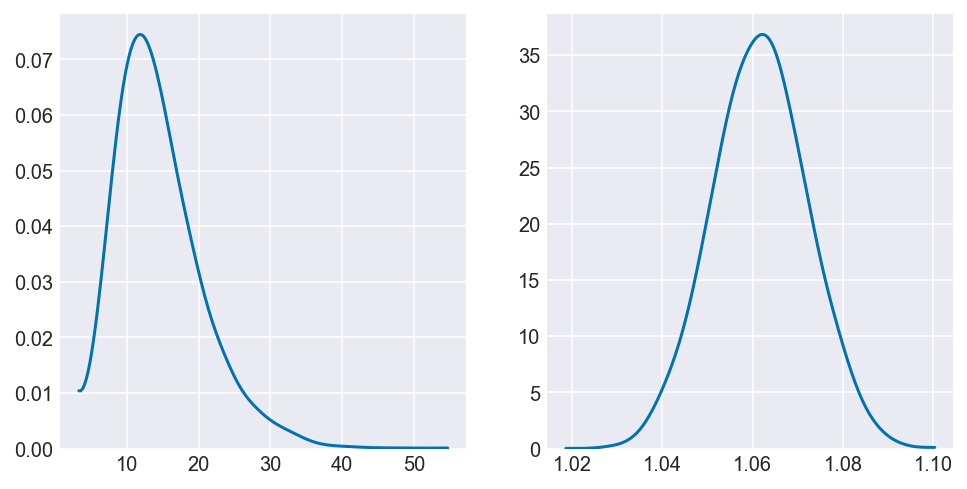

In [4]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)
_, ax = plt.subplots(1,2, figsize=(8,4))
pm.kdeplot(big, ax=ax[0])
pm.kdeplot(small, ax=ax[1]);

#### Code 4.5

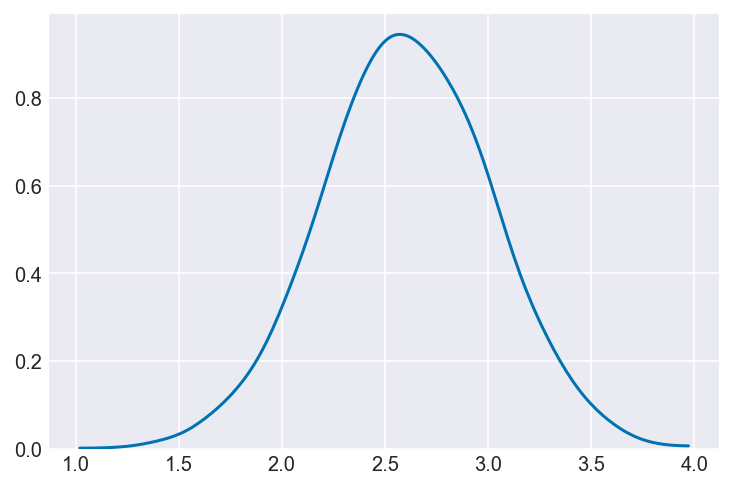

In [5]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
pm.kdeplot(log_big);

#### Code 4.6

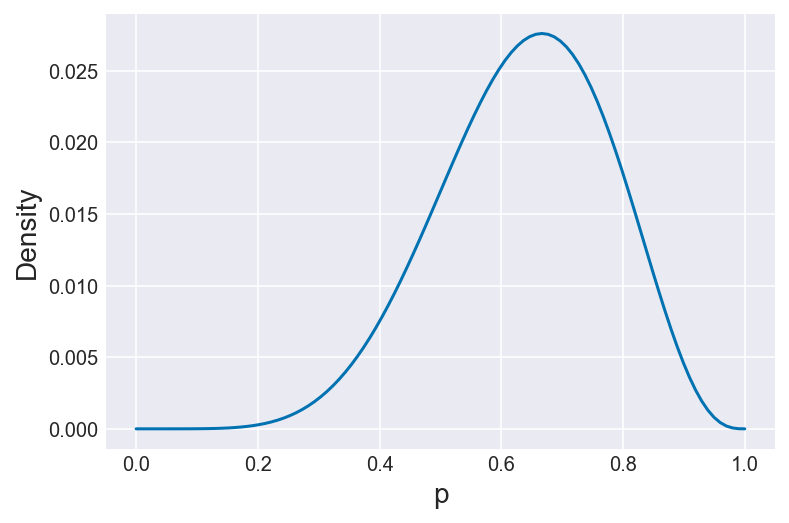

In [7]:
w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(k=w, n=n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior / (posterior).sum()
plt.plot(p_grid, posterior)
plt.xlabel('p', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 4.7 and 4.8

In [8]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

#### Code 4.9

In [9]:
d.describe()

height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000

#### Code 4.10

In [10]:
d.height.head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

#### Code 4.11

In [11]:
d2 = d[d.age >= 18]

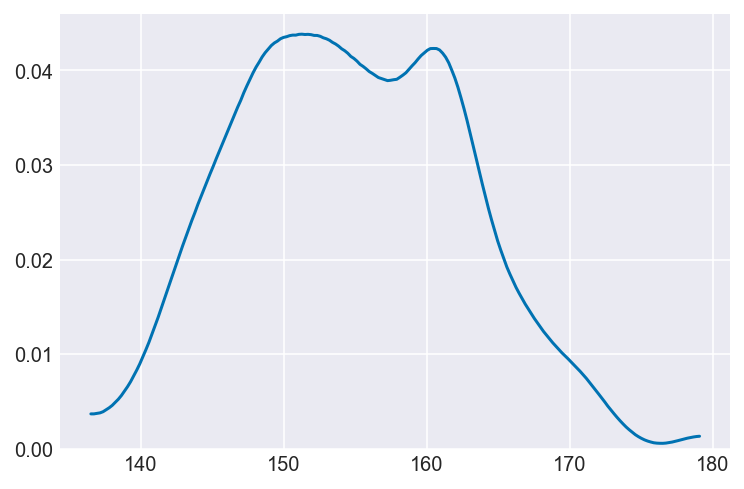

In [12]:
pm.kdeplot(d2.height);

#### Code 4.12

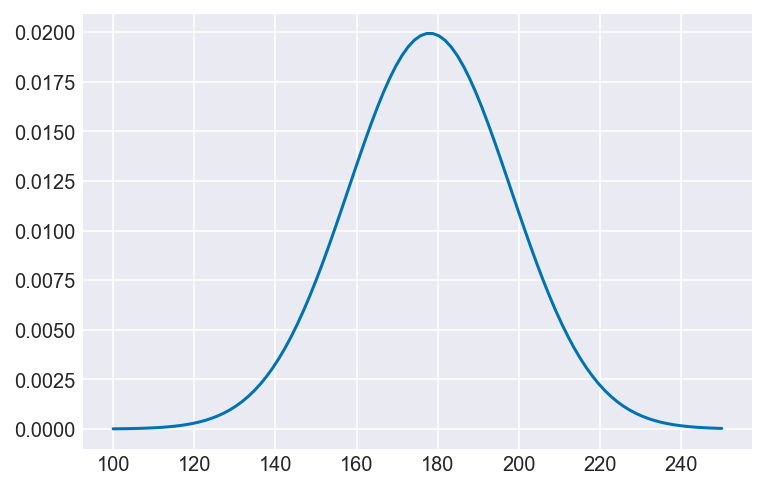

In [13]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

#### Code 4.13

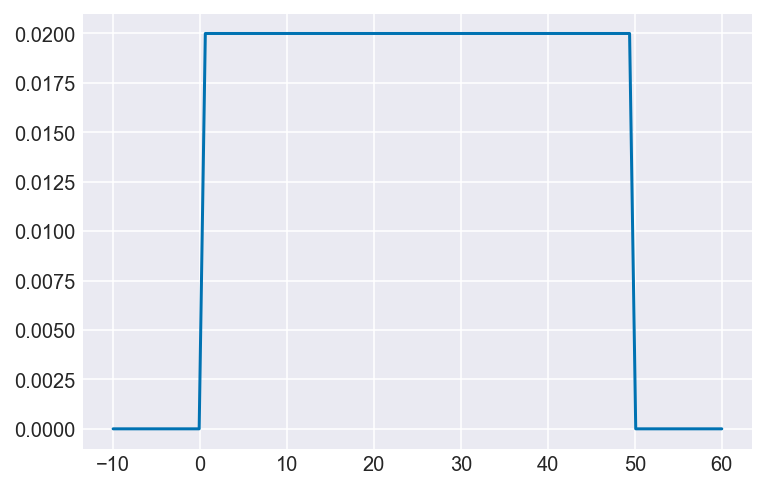

In [14]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

#### Code 4.14

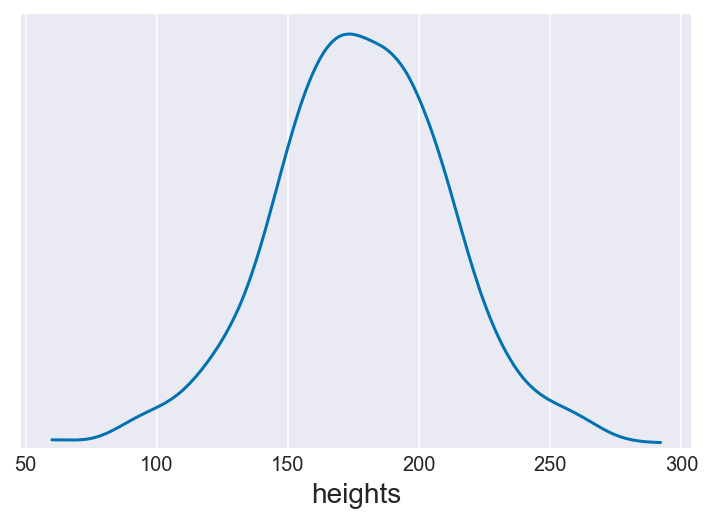

In [15]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
pm.kdeplot(prior_h)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

#### Code 4.15

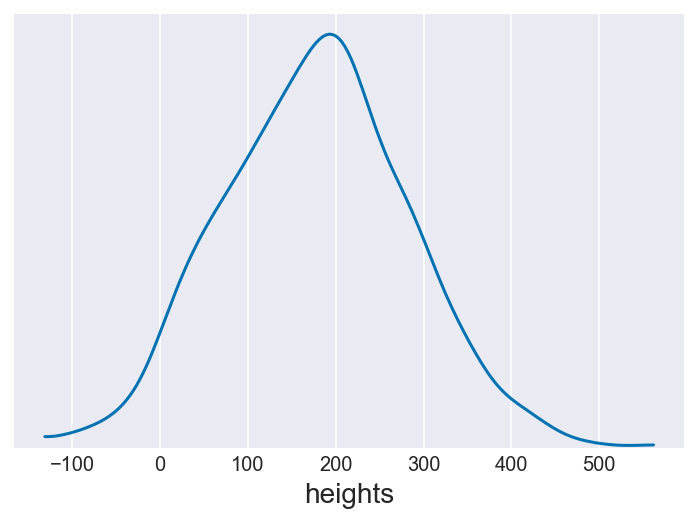

In [16]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=100, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
pm.kdeplot(prior_h)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

#### Code 4.16

In [17]:
post = np.mgrid[140:160:0.1, 4:9:0.025].reshape(2,-1).T

likelihood = [sum(stats.norm.logpdf(d2.height, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod = (likelihood + 
             stats.norm.logpdf(post[:,0], loc=178, scale=20) + 
             stats.uniform.logpdf(post[:,1], loc=0, scale=50))
post_prob = np.exp(post_prod - max(post_prod))

#### Code 4.17 and 4.18

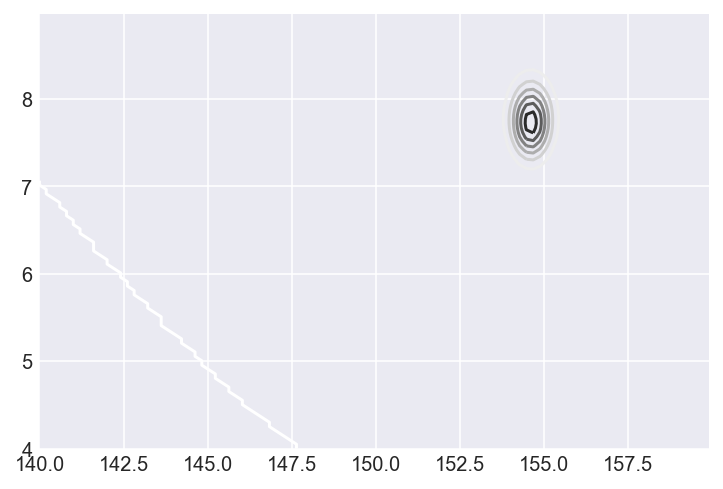

In [18]:
xi = np.linspace(post[:,0].min(), post[:,0].max(), 100)
yi = np.linspace(post[:,1].min(), post[:,1].max(), 100)
zi = griddata((post[:,0], post[:,1]), post_prob, (xi[None,:], yi[:,None]))

plt.contour(xi, yi, zi);

#### Code 4.19 and 4.20

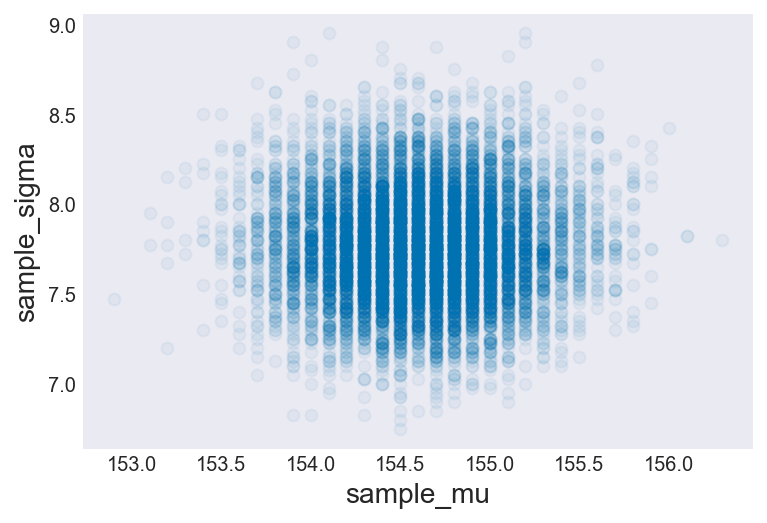

In [19]:
sample_rows = np.random.choice(np.arange(len(post)), size=10000, replace=True, 
                               p=(post_prob/post_prob.sum()))
sample_mu = post[:,0][sample_rows]
sample_sigma = post[:,1][sample_rows]

plt.plot(sample_mu, sample_sigma, 'o', alpha=0.05)
plt.axis('equal')
plt.grid(False)
plt.xlabel('sample_mu', fontsize=14)
plt.ylabel('sample_sigma', fontsize=14);

#### Code 4.21

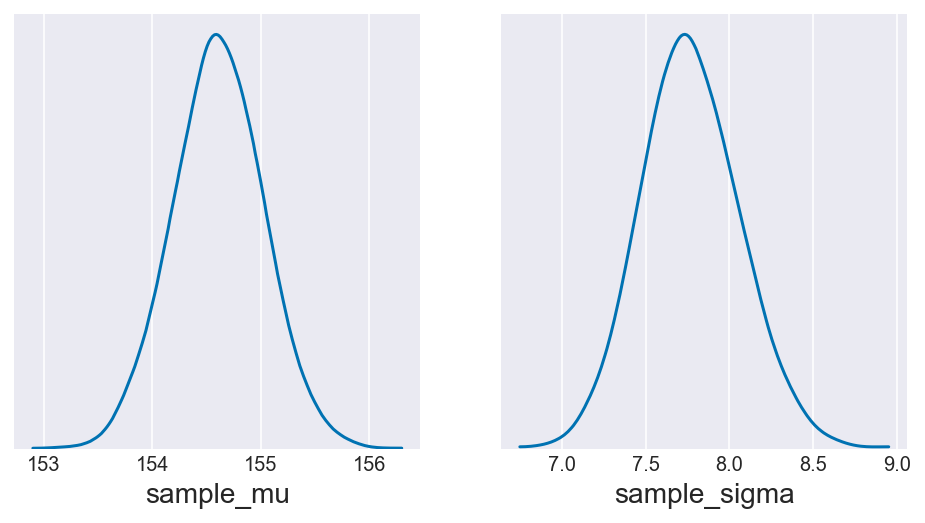

In [20]:
_, ax = plt.subplots(1,2, figsize=(8,4))
pm.kdeplot(sample_mu, ax=ax[0])
ax[0].set_xlabel('sample_mu', fontsize=14)
ax[0].set_yticks([])
pm.kdeplot(sample_sigma, ax=ax[1])
ax[1].set_xlabel('sample_sigma', fontsize=14)
ax[1].set_yticks([]);

#### Code 4.22

In [21]:
pm.hpd(sample_mu), pm.hpd(sample_sigma)

(array([153.8, 155.4]), array([7.2  , 8.325]))

#### Code 4.23 and 4.24

In [23]:
d3 = np.random.choice(d2.height, 20)
post2 = np.mgrid[150:170:0.1, 4:20:0.025].reshape(2,-1).T

likelihood2 = [sum(stats.norm.logpdf(d3, loc=post2[:,0][i], scale=post2[:,1][i])) for i in range(len(post2))]

post_prod2 = (likelihood2 + 
              stats.norm.logpdf(post2[:,0], loc=178, scale=20) + 
              stats.uniform.logpdf(post2[:,1], loc=0, scale=50))

post_prob2 = np.exp(post_prod2 - max(post_prod2))

sample_rows2 = np.random.choice(np.arange(len(post2)), size=10000, replace=True, 
                               p=(post_prob2/post_prob2.sum()))
sample_mu2 = post2[:,0][sample_rows2]
sample_sigma2 = post2[:,1][sample_rows2]

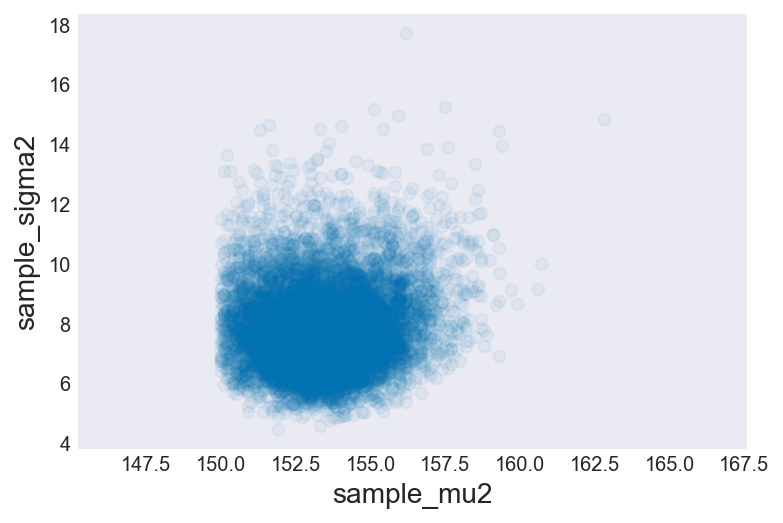

In [24]:
plt.plot(sample_mu2, sample_sigma2, 'o', alpha=0.05)
plt.axis('equal')
plt.xlabel('sample_mu2', fontsize=14)
plt.ylabel('sample_sigma2', fontsize=14)
plt.grid(False)

#### Code 4.25

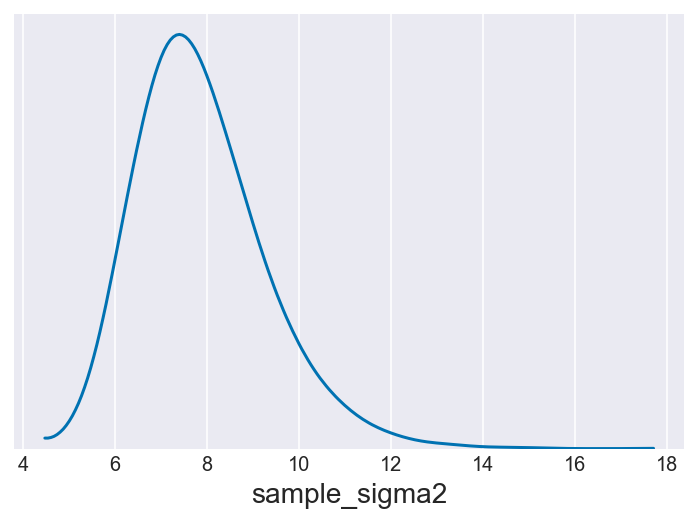

In [26]:
pm.kdeplot(sample_sigma2)
plt.xlabel('sample_sigma2', fontsize=14)
plt.yticks([]);

#### Code 4.26

We are repeating code 4.7, and 4.11

In [2]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]

#### Code 4.27

In [7]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)

#### Code 4.28 (with quadratic approximation)

In [24]:
with m4_1:
    means_m4_1 = pm.find_MAP(include_transformed=True)
    var_covar_m4_1 = (1/pm.find_hessian(means_m4_1, vars=[mu, sigma]))
    stds_m4_1 = np.diag(var_covar_m4_1)**0.5

logp = -1,235.2, ||grad|| = 11.697: 100%|██████████| 19/19 [00:00<00:00, 935.09it/s]   


####  Code 4. 29

In [25]:
print("mu: mean {mu_mean}, std {mu_std}".format(mu_mean=means_m4_1['mu'], mu_std=stds_m4_1[0]))
print("sigma: mean {s_mean}, std {s_std}".format(s_mean=means_m4_1['sigma'], s_std=stds_m4_1[1]))

mu: mean 154.60702358123825, std 0.41199399266738285
sigma: mean 7.731333025102713, std 0.29138557484355165


In [45]:
stats.norm(loc=means_m4_1['mu'], scale=stds_m4_1[0]).ppf([0.055, 0.945])

array([153.94857761, 155.26546955])

In [46]:
stats.norm(loc=means_m4_1['sigma'], scale=stds_m4_1[1]).ppf([0.055, 0.945])

array([7.2656426 , 8.19702345])

#### Code 4.30

In [50]:
start = { 'mu': d2['height'].mean(), 'sigma': d2['height'].std() }
with m4_1:
    means_m4_1 = pm.find_MAP(start=start)
    stds_m4_1 = np.diag((1/pm.find_hessian(means_m4_1, vars=[mu, sigma]))**0.5)

/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1,227.9, ||grad|| = 0.84718: 100%|██████████| 10/10 [00:00<00:00, 1793.36it/s]


#### 4.31

In [27]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    means_m4_2 = pm.find_MAP()
    var_covar_m4_2 = (1/pm.find_hessian(means_m4_2, vars=[mu, sigma]))
    stds_m4_2 = np.diag(var_covar_m4_2)**0.5
    mu_ci = stats.norm(loc=means_m4_2['mu'], scale=stds_m4_2[0]).ppf([0.055, 0.945])
    sigma_ci = stats.norm(loc=means_m4_2['sigma'], scale=stds_m4_2[1]).ppf([0.055, 0.945])
    
print("mu: mean {mu_mean}, std {mu_std}, ci {ci}".format(mu_mean=means_m4_2['mu'], mu_std=stds_m4_2[0], ci=mu_ci))
print("sigma: mean {s_mean}, std {s_std}, ci {ci}".format(s_mean=means_m4_2['sigma'], s_std=stds_m4_2[1], ci=sigma_ci))

/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1,630.1, ||grad|| = 14.075: 100%|██████████| 7/7 [00:00<00:00, 109.46it/s]


mu: mean 177.8637542782457, std 0.09970848816131615, ci [177.70440086 178.0231077 ]
sigma: mean 24.517551863531022, std 0.9240393026155873, ci [23.04075859 25.99434514]


#### Code 4.32

So, the variance-covariance matrix obtain using PyMc differs a lot from the one in the book:

In [31]:
var_covar_m4_1

array([[  0.16973905, -66.09961321],
       [-66.09961321,   0.08490555]])

So it is probably better to not use it.

#### Code 4.33

In [46]:
np.diag(var_covar_m4_1)

array([0.16973905, 0.08490555])

In [45]:
from statsmodels.stats.moment_helpers import cov2corr, corr2cov

In [47]:
cov2corr(var_covar_m4_1)

array([[   1.        , -550.60479164],
       [-550.60479164,    1.        ]])

Due to this difference we will use

###  Using MCMC

#### Code 4.34 (with MCMC)

We could use a quadratic approximation like McElreath does in his book and we did in code 2.6. But Using PyMC3 is really simple to just sample from the model using a "sampler method". Most common sampler methods are members of the Markov Chain Monte Carlo Method (MCMC) family (for details read Section 2.4.3 and Chapter 8 of Statistical Rethinking).

PyMC3 comes with various samplers. Some samplers are more suited than others for certain type of variable (and/or problems). For now we are going to let PyMC3 choose the sampler for us. PyMC3 also tries to provide a reasonable starting point for the simulation. By default PyMC3 uses the same adaptive procedure as in STAN `'jitter+adapt_diag'`, which start with a identity mass matrix and then adapt a diagonal based on the variance of the tuning samples. 

You can read more details of PyMC3 [here](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html)

In [69]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:05<00:00, 739.67draws/s] 


In [70]:
pm.trace_to_dataframe(trace_4_1).head()

mu     sigma
0  154.443685  8.108560
1  154.218195  7.572889
2  154.218195  7.572889
3  154.766918  7.855536
4  153.960787  7.575266

#### Code 4.35

Notice that compared to the table in the book we have an extra column, "mc_error". Since we are sampling from the posterior, there is an error introducing by the sampling process. This error can be reduced by taking more samples.

In [71]:
pm.summary(trace_4_1, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     154.60  0.42      0.01   153.87    155.21  1788.02   1.0
sigma    7.77  0.29      0.01     7.29      8.20  2249.10   1.0

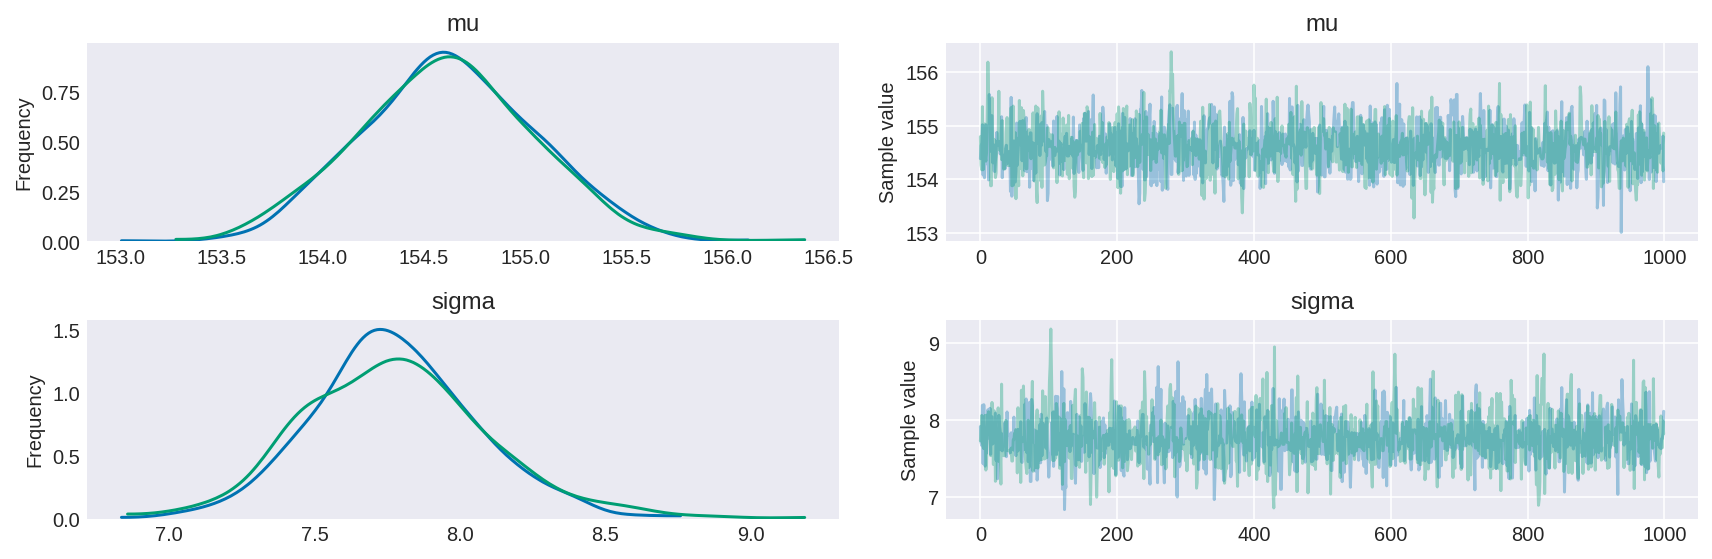

In [24]:
pm.traceplot(trace_4_1); # this function let you check the samples values

#### Code 4.28-35

In [4]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d2.height.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2.height.std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:05<00:00, 798.43draws/s] 


mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     154.59  0.42      0.01   153.94    155.28  1683.74   1.0
sigma    7.76  0.31      0.01     7.24      8.21  2082.17   1.0

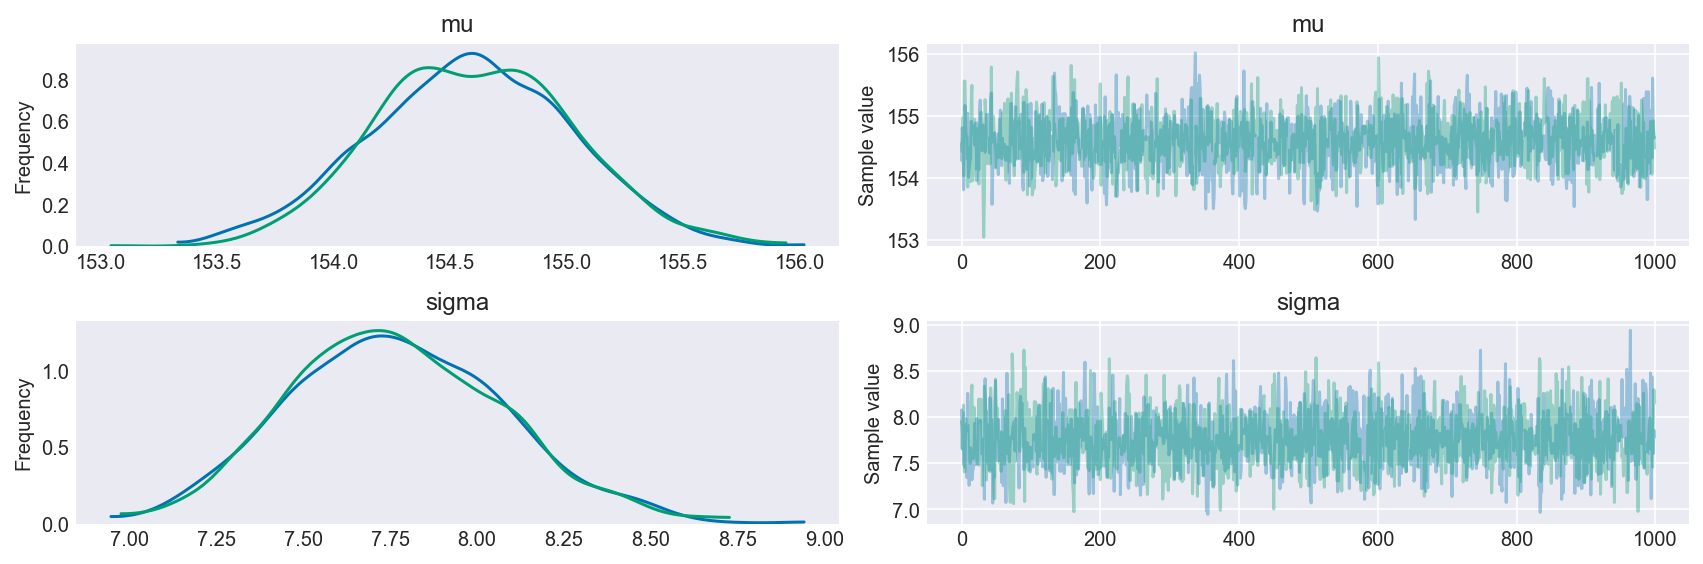

In [5]:
pm.traceplot(trace_4_1); 
pm.summary(trace_4_1, alpha=.11).round(2)

In [6]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:05<00:00, 788.10draws/s] 


In [7]:
pm.summary(trace_4_2, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     177.86  0.10      0.00   177.70    178.02  2006.76   1.0
sigma   24.64  0.95      0.02    23.18     26.17  1896.97   1.0

For some computations could be nice to have the trace turned into a DataFrame, this can be done using the `trace_to_dataframe` function

In [8]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

mu     sigma
mu     0.178501 -0.000699
sigma -0.000699  0.094473

#### Code 4.31

In [9]:
np.diag(trace_df.cov())

array([0.17850084, 0.09447285])

In [10]:
trace_df.corr()

mu     sigma
mu     1.000000 -0.005386
sigma -0.005386  1.000000

#### Code 4.32

We did not use the quadratic approximation, instead we use a MCMC method to sample from the posterior. Thus, we already have samples. We can do something like

In [33]:
trace_df.head()

mu     sigma
0  155.050929  7.826636
1  154.274359  7.351060
2  155.088515  8.076892
3  154.215597  7.707074
4  155.161167  7.543476

Or directly from the trace (we are getting the first ten samples of _sigma_)

In [34]:
trace_4_1['sigma'][:10]

array([7.82663573, 7.35106047, 8.07689167, 7.70707396, 7.54347568,
       7.52542974, 7.79298871, 7.57613305, 8.14147852, 7.74289991])

#### Code 4.33

In our case, this is the same we did in the code 4.27

In [35]:
pm.summary(trace_4_1, alpha=.11).round(2)

/home/datauser/miniconda3/envs/pymc3_resources/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     154.59  0.42      0.01   153.84    155.21  1956.36   1.0
sigma    7.78  0.30      0.01     7.28      8.23  1871.01   1.0

#### Code 4.34

In [36]:
stats.multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10)

array([[154.25708976,   7.43571732],
       [155.4254256 ,   7.91683692],
       [154.29099654,   7.54958309],
       [155.04476474,   7.54171164],
       [154.98518537,   8.10430341],
       [154.46218398,   7.75645797],
       [154.71847627,   7.90052339],
       [154.28967945,   7.85305766],
       [154.27086551,   7.58005046],
       [154.79000028,   7.79609671]])

#### Code 4.35 and 4.36

Instead of sampling from a normal and then exponentiating to ensure sigma is positive, we can use the lognormal distribution for the same result. The Lognormal distribution is parametrized in terms of $\tau$ (tau) the precision and not the standard deviation, where: 

$$tau=\frac{1}{\sigma^2}$$

The normal distribution can also be parametrized in terms of the precision (tau). Given that the conversion between both parametrization is done right, which one to use is only a matter of convenience. 

In [37]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Lognormal('sigma', mu=2, tau=0.01)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_1_logsigma = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]
100%|██████████| 2000/2000 [01:33<00:00, 21.40it/s]
/home/datauser/miniconda3/envs/pymc3_resources/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


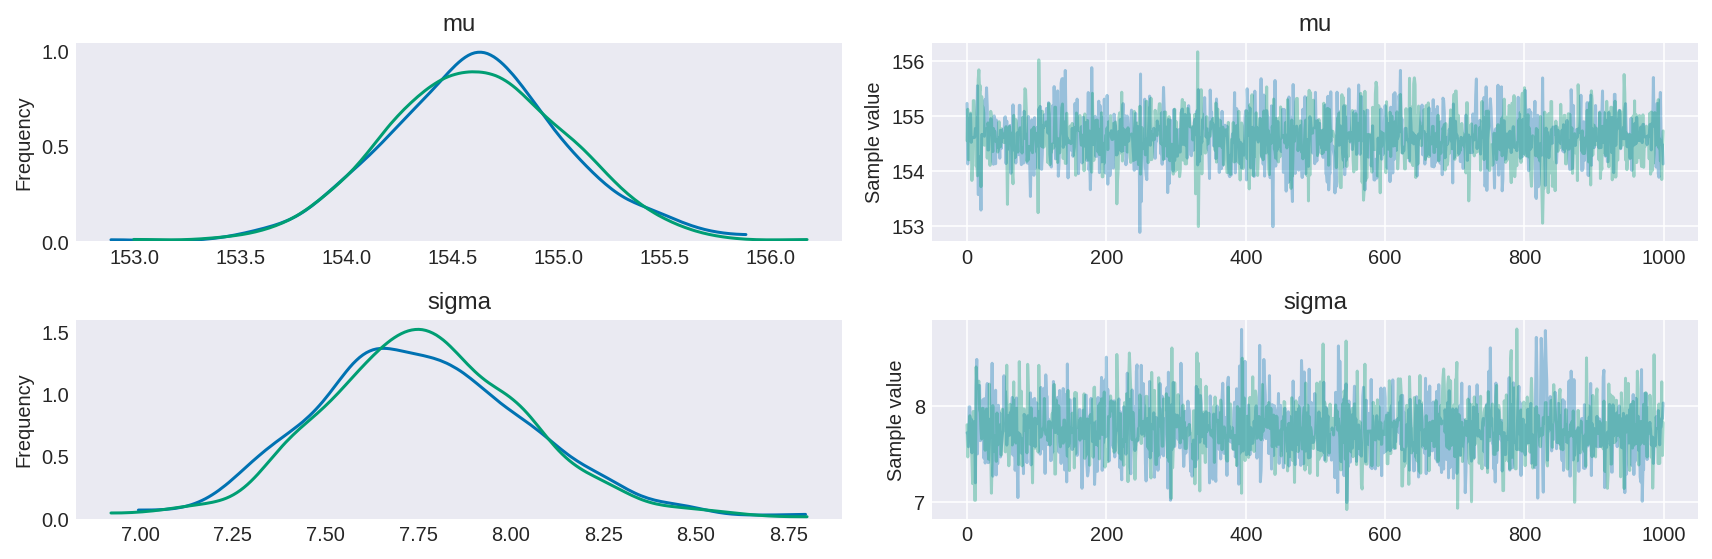

In [38]:
pm.traceplot(trace_4_1_logsigma);

## 4.4 Adding a predictor

#### Code 4.37

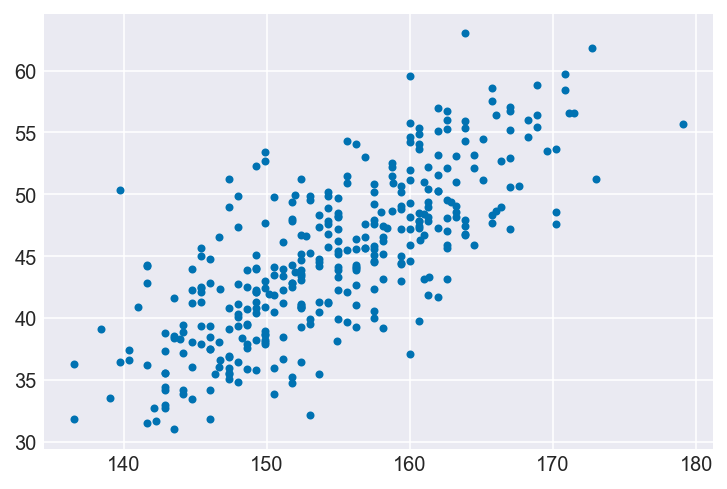

In [3]:
plt.plot(d2.height, d2.weight, '.');

#### Code 4.38

In [35]:
N = 100
a = stats.norm.rvs(loc=178, scale=20, size=N)
b = stats.norm.rvs(loc=0, scale=10, size=N)

####  Code 4.39

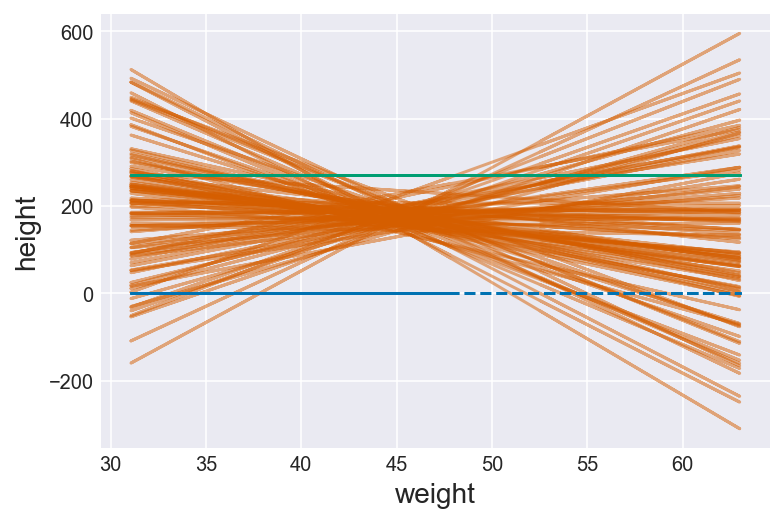

In [20]:
for (ai, bi) in zip(a,b):
    plt.plot(d2.weight, ai + bi * (d2.weight - d2.weight.mean()), 'C2-', alpha=0.5)
plt.plot(d2.weight, np.zeros(len(d2.weight)), '--')
plt.plot(d2.weight, np.zeros(len(d2.weight)) + 272)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.40

In [27]:
x = stats.lognorm.rvs(1, loc=0, scale=1, size=10000)
print(x.mean())
print(x.std())
print(np.percentile(x, [5.5, 94.5]))

1.6867127410015026
2.350045673281097
[0.20360779 5.036684  ]


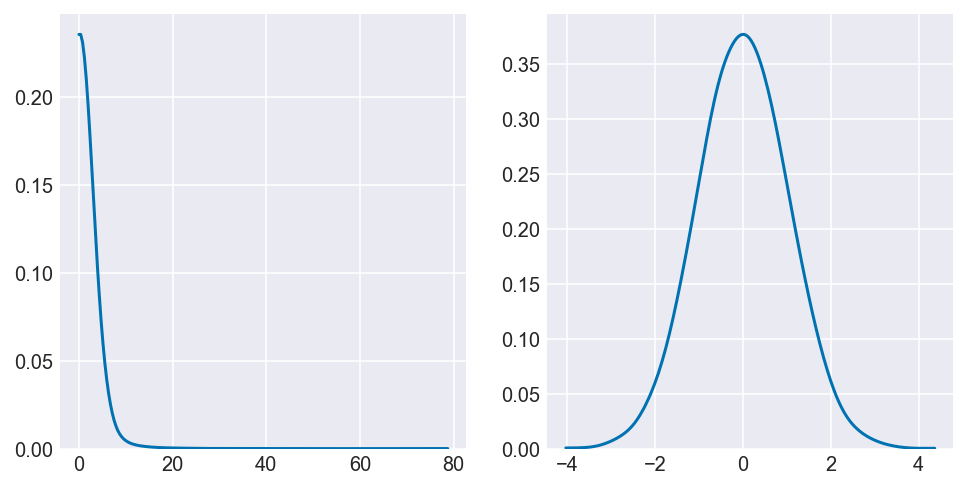

In [33]:
_, ax = plt.subplots(1,2, figsize=(8,4))
pm.kdeplot(x, ax=ax[0])
pm.kdeplot(np.log(x), ax=ax[1]);

#### Code 4.41

In [36]:
N = 100
a = stats.norm.rvs(loc=178, scale=20, size=N)
b = stats.lognorm.rvs(1, loc=0, scale=1, size=N)

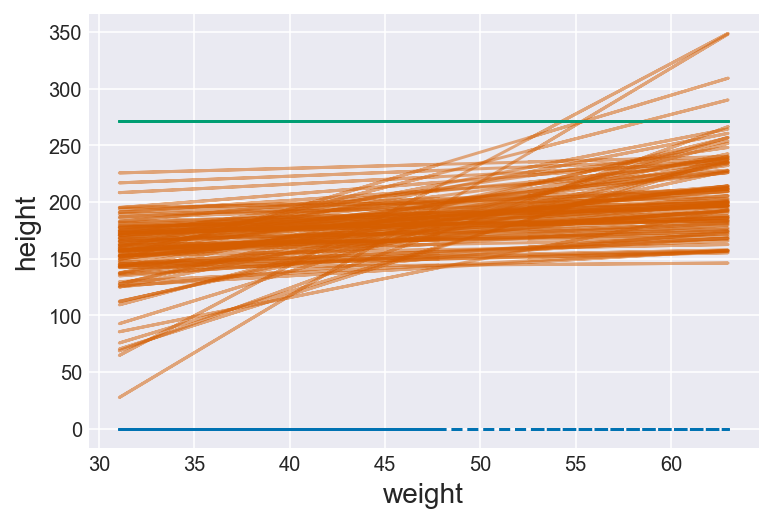

In [37]:
for (ai, bi) in zip(a,b):
    plt.plot(d2.weight, ai + bi * (d2.weight - d2.weight.mean()), 'C2-', alpha=0.5)
plt.plot(d2.weight, np.zeros(len(d2.weight)), '--')
plt.plot(d2.weight, np.zeros(len(d2.weight)) + 272)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.42

Notice that the variable mu is defined as alpha + beta * d2.weight in a single line. If we want the trace to contain mu we can write as a deterministic variable. The computating will be exactly the same. The only difference is that mu will be accessible in the trace.

In [2]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]
xbar = d2['weight'].mean()

In [37]:
with pm.Model() as m4_3:
    alpha = pm.Normal('alpha', mu=178, sd=20)
    beta = pm.Lognormal('beta', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    #mu = alpha + beta * (d2.weight - xbar)
    mu = pm.Deterministic('mu', alpha + beta * (d2.weight-xbar)) # try uncomenting this line and comenting the above line
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:04<00:00, 908.76draws/s] 


#### Code 4.43

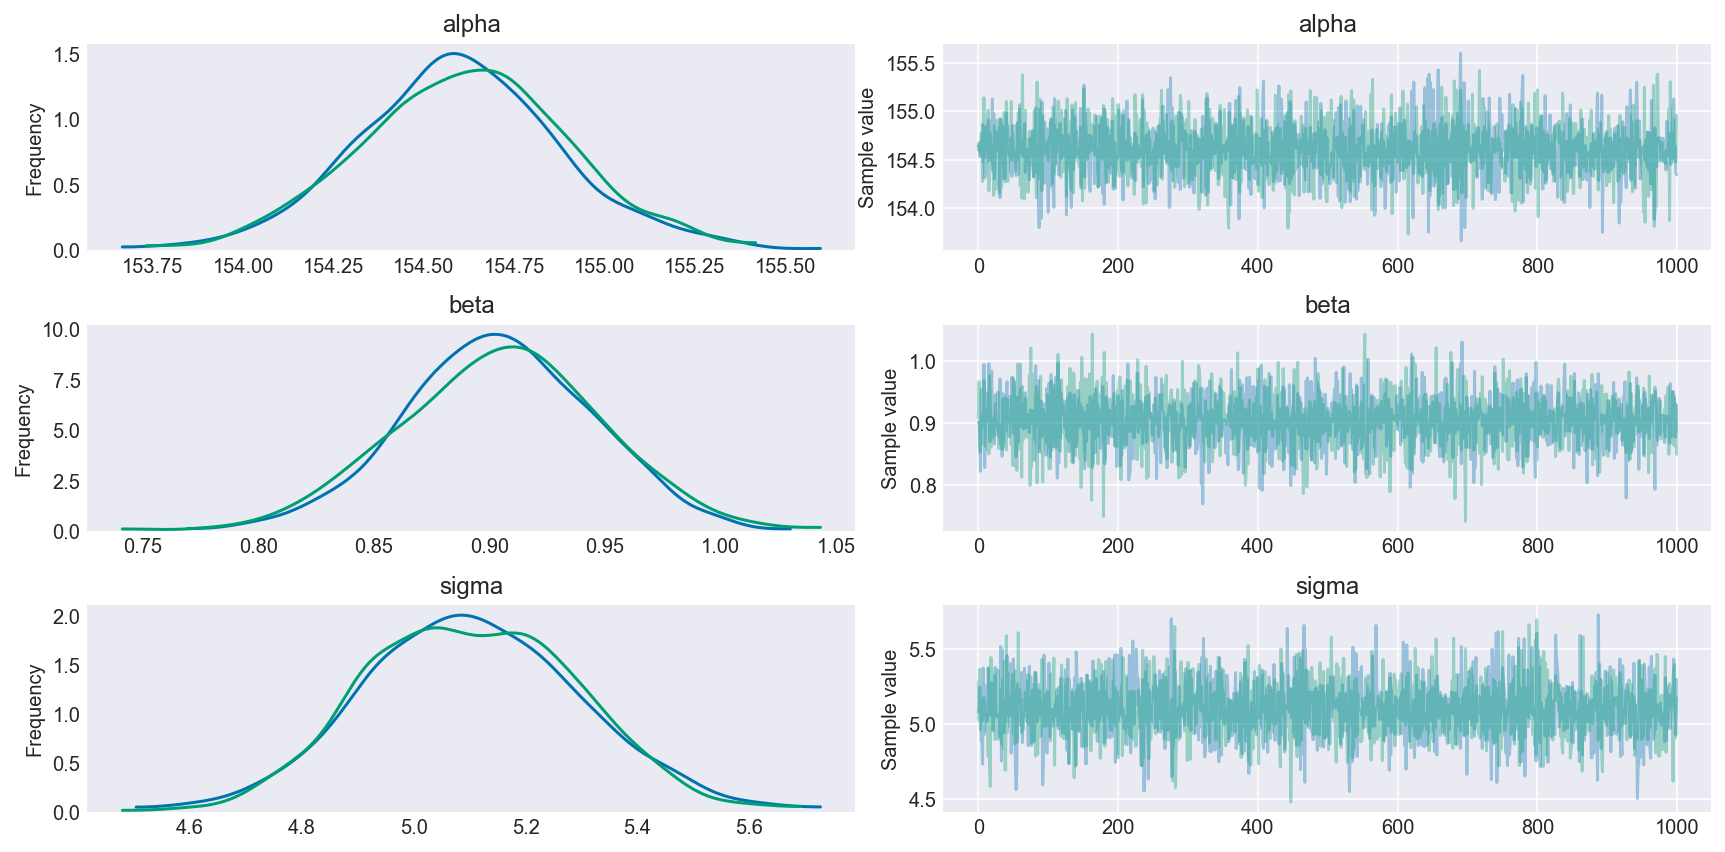

In [43]:
pm.traceplot(trace_4_3);

Another alternative is to write mu inside the likelihood and not as a separate line.

    height = pm.Normal('height', mu=alpha + beta * d2.weight, sd=sigma, observed=d2.height)
    
Using PyMC3 there is not too much reason to do this. I personally think that defining mu in a separate line improves readability.

In [46]:
with pm.Model() as m4_3b:
    alpha = pm.Normal('alpha', mu=178, sd=20)
    log_beta = pm.Normal('log_beta', mu=0, sd=1)
    beta = pm.Deterministic('beta', np.exp(log_beta))
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * (d2.weight - xbar)
    #mu = pm.Deterministic('mu', alpha + beta * d2.weight) # try uncomenting this line and comenting the above line
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_3b = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, log_beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1142.10draws/s]


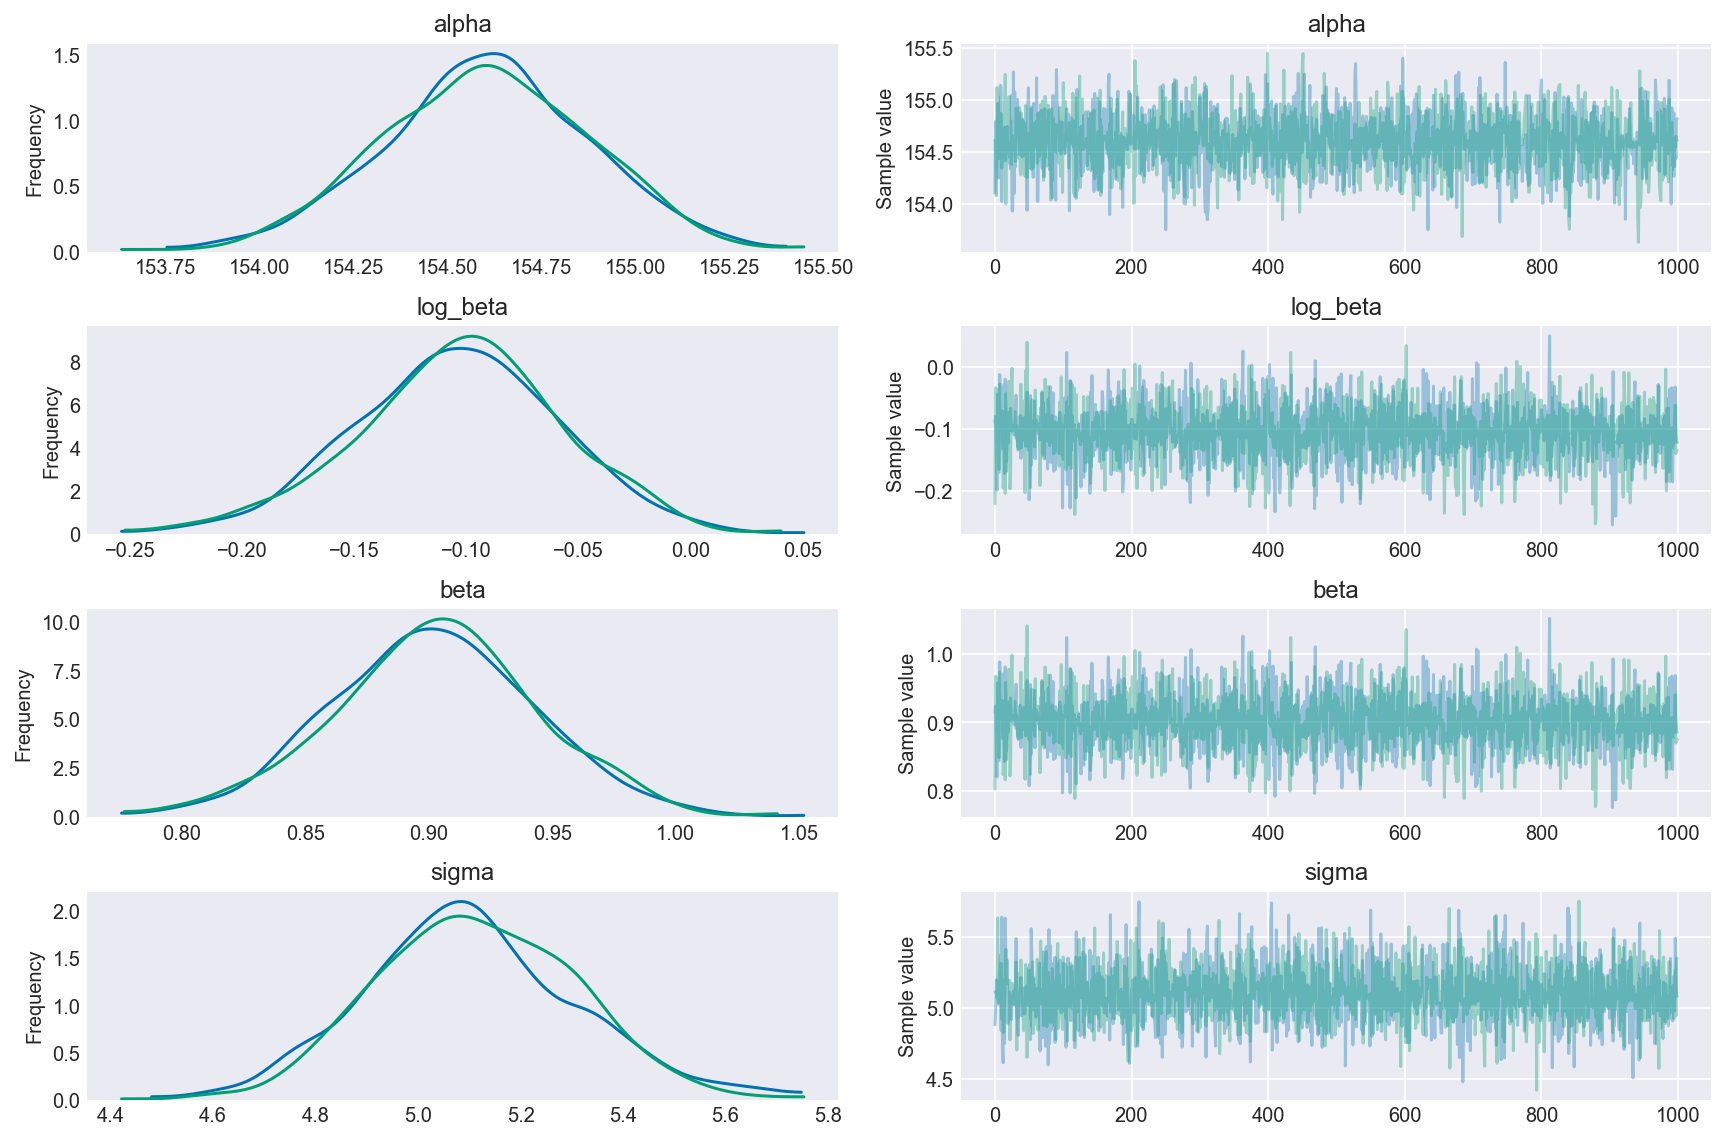

In [47]:
pm.traceplot(trace_4_3b);

#### Code 4.44

In [4]:
pm.summary(trace_4_3, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
alpha  154.6  0.27      0.01   154.18    155.05  3123.46   1.0
beta     0.9  0.04      0.00     0.83      0.96  2747.82   1.0
sigma    5.1  0.20      0.00     4.77      5.40  2696.85   1.0

#### Code 4.45

In [5]:
trace_df = pm.trace_to_dataframe(trace_4_3)
trace_df.corr().round(2)

alpha  beta  sigma
alpha   1.00 -0.00   0.01
beta   -0.00  1.00   0.03
sigma   0.01  0.03   1.00

#### Code 4.46

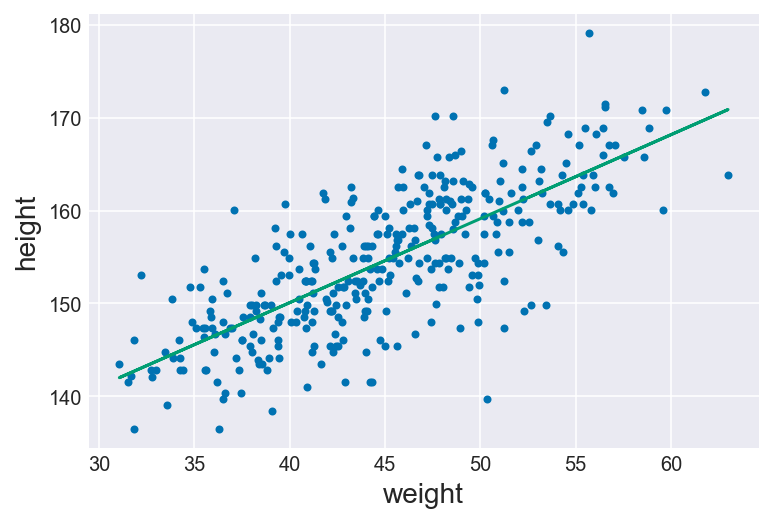

In [6]:
plt.plot(d2.weight, d2.height, '.')
plt.plot(d2.weight, trace_4_3['alpha'].mean() + trace_4_3['beta'].mean() * (d2.weight-xbar))
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.47

In [7]:
pm.trace_to_dataframe(trace_4_3).head()

alpha      beta     sigma
0  154.492076  0.838055  4.726968
1  154.438740  0.845933  4.959427
2  154.847700  0.939156  5.166227
3  154.435665  0.904507  5.271338
4  155.014994  0.842284  5.204774

#### Code 4.48

In [16]:
N = [10, 50, 150, 352][0]
with pm.Model() as m_N:
    alpha = pm.Normal('alpha', mu=178, sd=20)
    beta = pm.Lognormal('beta', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta * d2.weight[:N])
    height_hat = pm.Normal('height_hat', mu=mu, sd=sigma, observed=d2.height[:N])
    trace_N = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:10<00:00, 385.68draws/s]
The acceptance probability does not match the target. It is 0.8887098729813798, but should be close to 0.8. Try to increase the number of tuning steps.


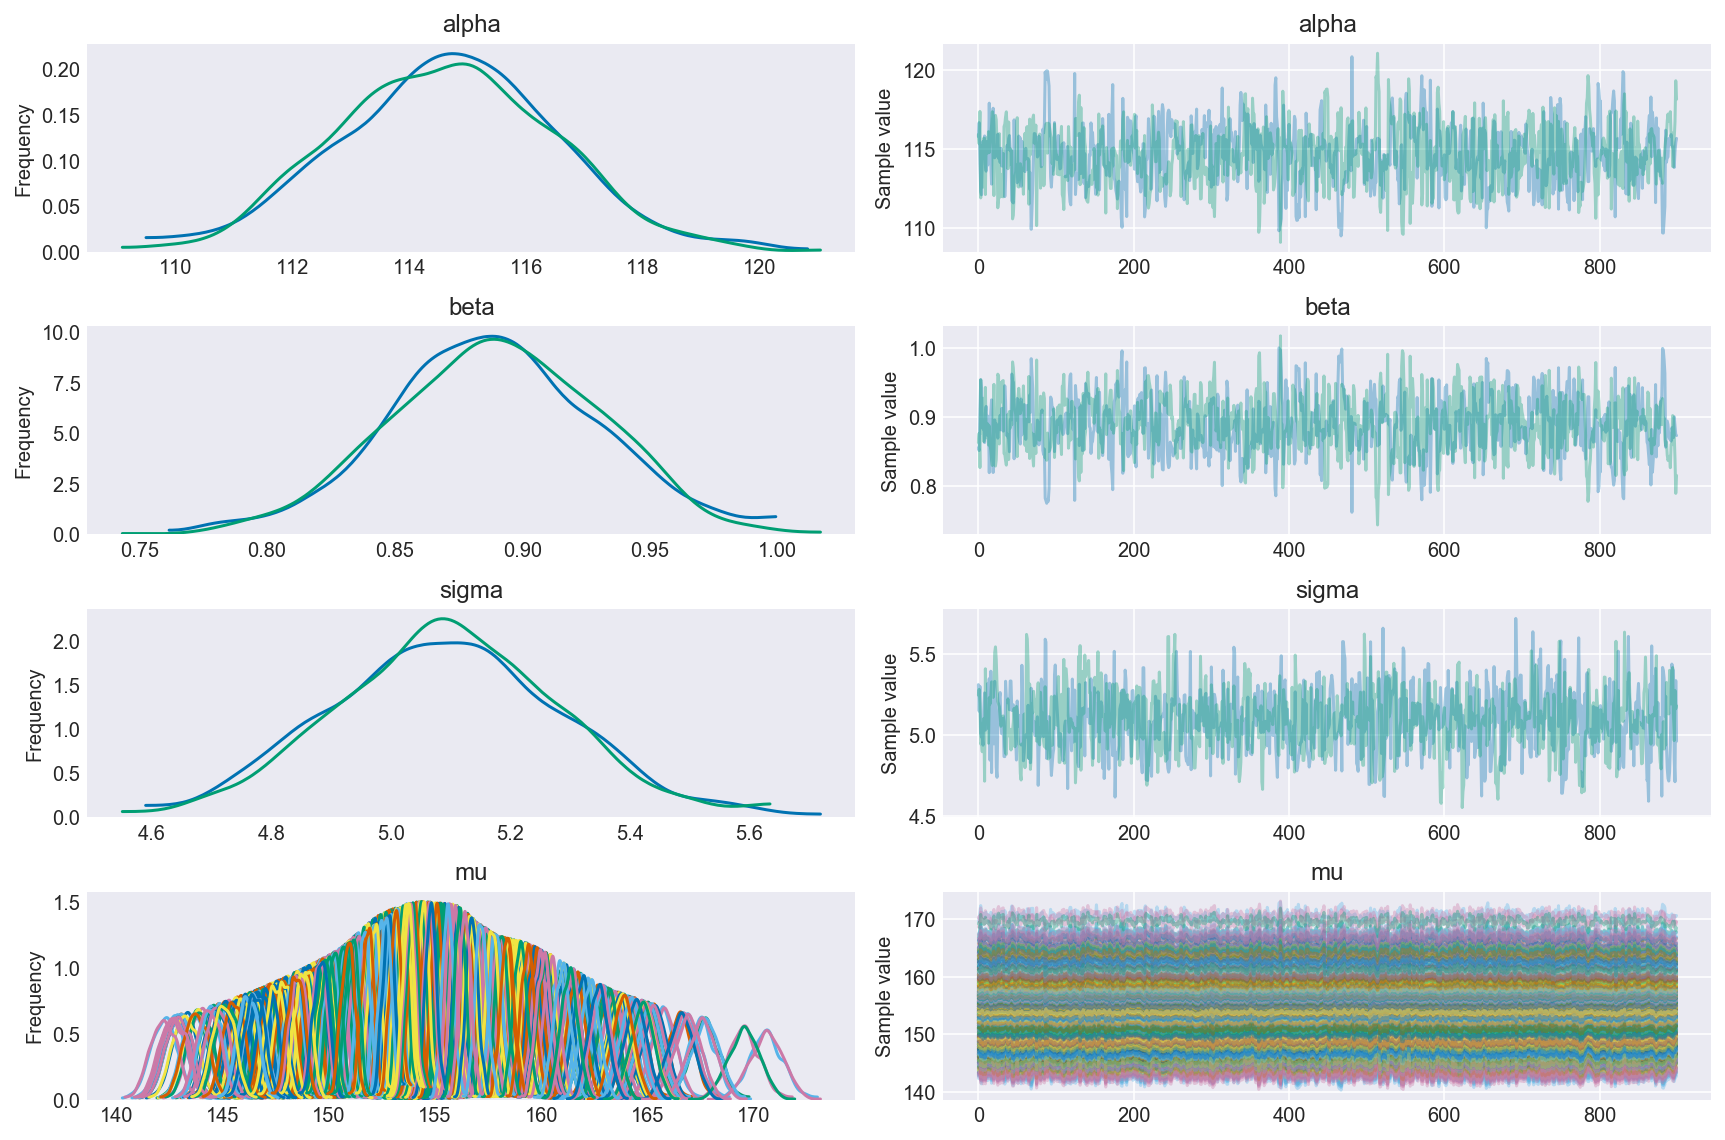

In [19]:
chain_N = trace_N[100:]
pm.traceplot(chain_N);

#### Code 4.49

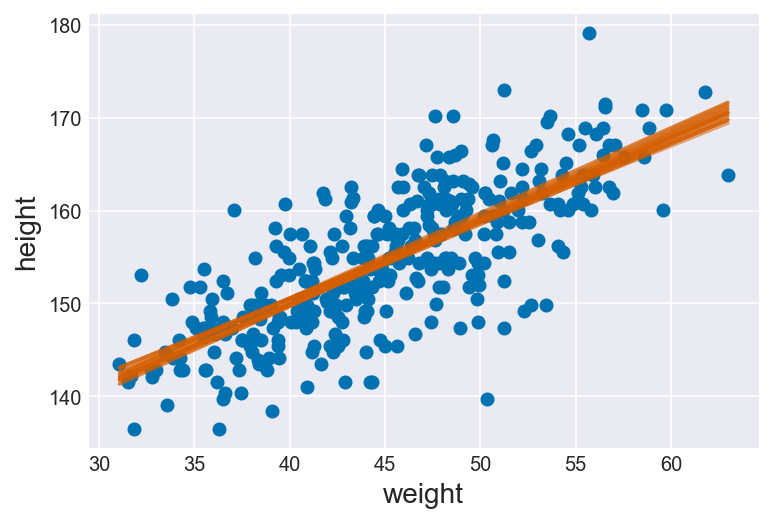

In [20]:
plt.plot(d2.weight[:N], d2.height[:N], 'C0o')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    plt.plot(d2.weight[:N], chain_N['alpha'][idx] + chain_N['beta'][idx] * d2.weight[:N], 'C2-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

Alternative we can directly use the deterministic mu variable

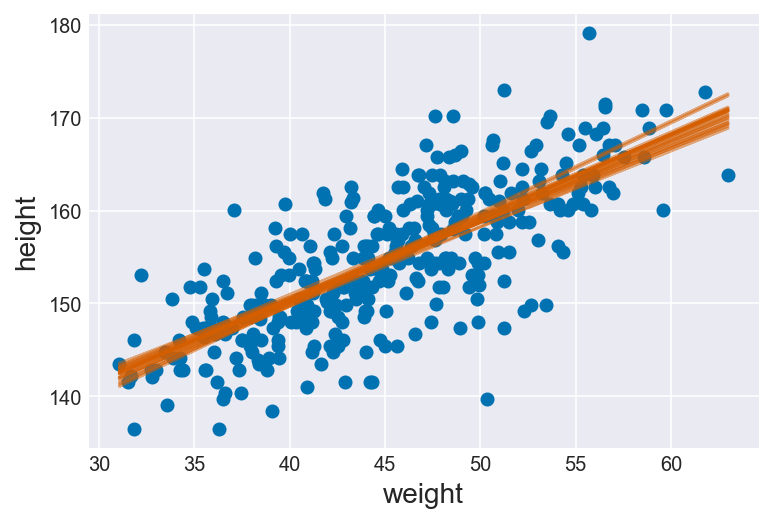

In [21]:
plt.plot(d2.weight[:N], d2.height[:N], 'C0o')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    plt.plot(d2.weight[:N], chain_N['mu'][idx], 'C2-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.50 and 4.51

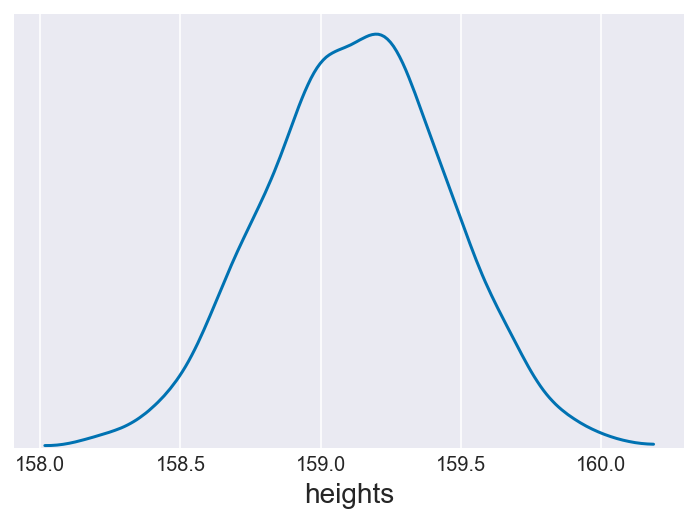

In [38]:
mu_at_50 = trace_4_3['alpha'] + trace_4_3['beta'] * (50 - xbar)
pm.kdeplot(mu_at_50)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

#### Code 4.52

In [39]:
pm.hpd(mu_at_50, alpha=.11)

array([158.62618095, 159.66648452])

#### Code 4.53

Using PyMC3, we do not need to compute anything else. By defining a deterministic variable mu in the model, we add that variable to the trace. Thus we get a matrix with row samples from the posterior and columns values of weights. We can access this matrix directly from the trace or turn it into a DataFrame, it all depends on what we need.

In [40]:
df_trace_4_3 = pm.trace_to_dataframe(trace_4_3).filter(regex=('mu.*'))
df_trace_4_3.head()

mu__0       mu__1       mu__2       mu__3       mu__4       mu__5  \
0  157.371275  146.934271  142.681191  162.172298  151.343905  171.330769   
1  156.877794  146.999913  142.974677  161.421619  151.173318  170.089459   
2  157.705804  147.540786  143.398541  162.381712  151.835506  171.301516   
3  157.530066  146.214234  141.603032  162.735350  150.995173  172.664993   
4  157.450824  146.863805  142.549595  162.320853  151.336821  171.610963   

        mu__6       mu__7       mu__8       mu__9  ...     mu__342  \
0  148.552006  164.416254  145.446997  163.503016  ...  153.874879   
1  148.530985  163.545363  145.592315  162.681048  ...  153.568704   
2  149.116364  164.567191  146.092271  163.677752  ...  154.300523   
3  147.968188  165.168254  144.601728  164.178118  ...  153.739262   
4  148.504793  164.597062  145.355155  163.670698  ...  153.904173   

      mu__343     mu__344     mu__345     mu__346     mu__347     mu__348  \
0  157.423460  149.621799  151.135165  150.926425  156.640685  144.872962   
1  156.927183  149.543467  150.975760  150.778202  156.186342  145.049032   
2  157.756629  150.158278  151.632206  151.428905  156.994253  145.533195   
3  157.586646  149.128061  150.768856  150.542540  156.737958  143.979357   
4  157.503759  149.589962  151.125080  150.913340  156.709733  144.772869   

      mu__349     mu__350     mu__351  
0  161.363430  163.111628  161.702632  
1  160.656083  162.310628  160.977114  
2  161.593924  163.296564  161.924287  
3  161.858372  163.753774  162.226137  
4  161.500359  163.273685  161.844437  

[5 rows x 352 columns]

#### Code 4.54 and 4.58

We are doing _manually_, in the book is done using the ```link``` function. In the book on code 4.58 the following operations are performed _manually_.

In [41]:
weight_seq = np.arange(25, 71)
# Given that we have a lot of samples we can use less of them for plotting (or we can use all!)
chain_4_3_thinned = trace_4_3[::10]
mu_pred = np.zeros((len(weight_seq), len(chain_4_3_thinned)*trace_4_3.nchains))
for i, w in enumerate(weight_seq):
    mu_pred[i] = chain_4_3_thinned['alpha'] + chain_4_3_thinned['beta'] * (w-xbar)

#### Code 4.55

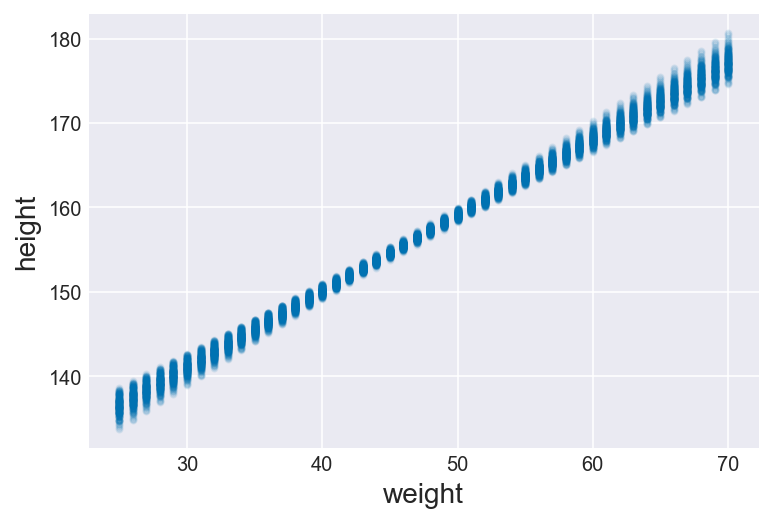

In [42]:
plt.plot(weight_seq, mu_pred, 'C0.', alpha=0.1)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14);

#### Code 4.56

In [43]:
mu_mean = mu_pred.mean(1)
mu_hpd = pm.hpd(mu_pred.T, alpha=.11)

#### Code 4.57

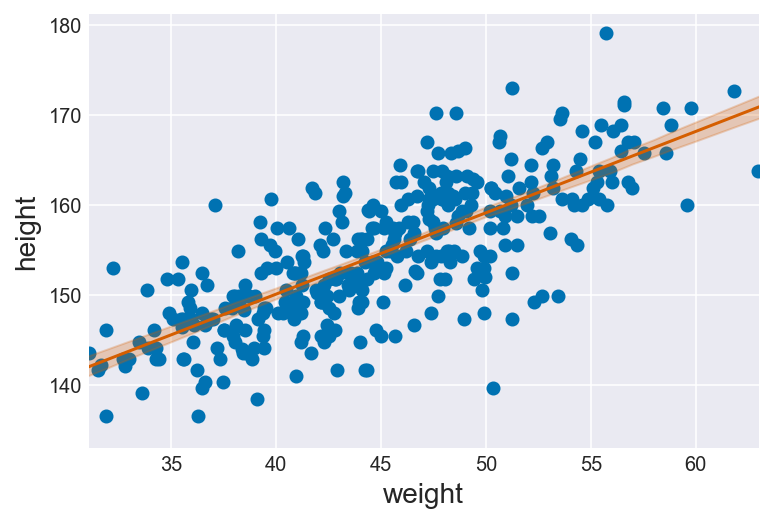

In [46]:
plt.scatter(d2.weight, d2.height)
plt.plot(weight_seq, mu_mean, 'C2')
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight.min(), d2.weight.max());

#### Code 4.59

Now we are going to use ```sample_ppc()``` from PyCM3. This function give us posterior predictive samples, that is for each value of the input variable we get a sample (from the posterior) of the output variable. Thus in the following example the shape of height_pred['height'].shape is (200, 352)

In [97]:
height_pred = pm.sample_ppc(trace_4_3, 10000, m4_3)

/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 10000/10000 [00:06<00:00, 1448.12it/s]


#### Code 4.60

In [98]:
height_pred_mean = height_pred['height'].mean(0)
height_pred_hpd = pm.hpd(height_pred['height'], alpha=.11)

In [99]:
height_pred_hpd_3 = pm.hpd(height_pred['height'], alpha=.03)

#### Code 4.61
```sample_ppc``` returns values corresponding to the input values (weights in this example). Because the weights are not ordered if we use them with the ```fill_between``` function we will get a mess. For that reason in the following cell we order the weights and the predicted heights

In [100]:
idx = np.argsort(d2.weight.values)
d2_weight_ord = d2.weight.values[idx]
height_pred_hpd = height_pred_hpd[idx]
height_pred_hpd_3 = height_pred_hpd_3[idx]

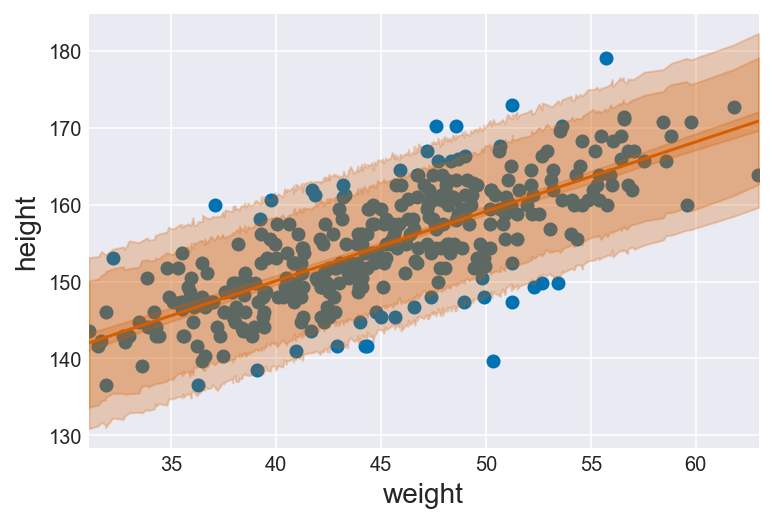

In [101]:
plt.scatter(d2.weight, d2.height)
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(d2_weight_ord, height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(d2_weight_ord, height_pred_hpd_3[:,0], height_pred_hpd_3[:,1], color='C2', alpha=0.25)
plt.plot(weight_seq, mu_mean, 'C2')
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight.min(), d2.weight.max());

#### Code 4.62

Change the number of samples used in 4.59 (200) to other values. Because we are getting samples at the input values the jaggedness of this plot is larger than the one in the book.

#### Code 4.63

Now we are going to generate heights from the posterior _manually_, instead of restricting to the input values we are going to pass an array of equally spaced weights values ```weight_seg```.

In [105]:
weight_seq = np.arange(25, 71)
post_samples = []
for _ in range(1000): # number of samples from the posterior
    i = np.random.randint(len(trace_4_3))
    mu_pred = trace_4_3['alpha'][i] + trace_4_3['beta'][i] * (weight_seq-xbar)
    sigma_pred = trace_4_3['sigma'][i]
    post_samples.append(np.random.normal(mu_pred, sigma_pred))

In [106]:
post_samples_hpd = pm.hpd(np.array(post_samples))

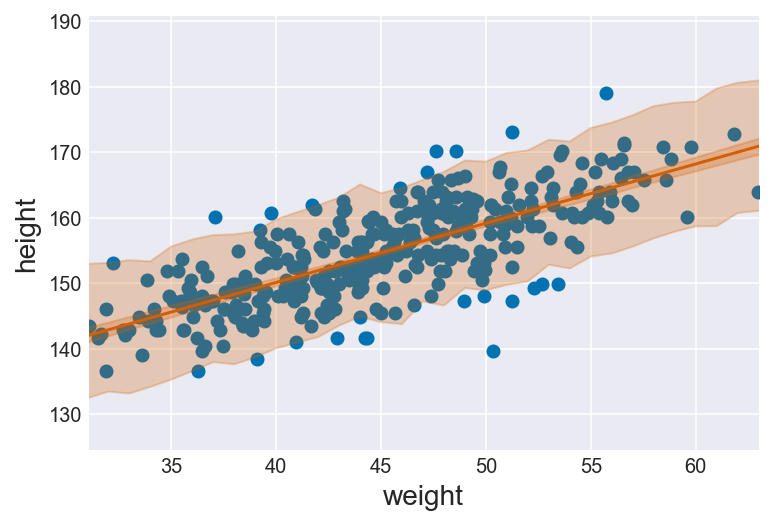

In [107]:
plt.scatter(d2.weight[:N], d2.height[:N])
plt.plot(weight_seq, mu_mean, 'C2')
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(weight_seq, post_samples_hpd[:,0], post_samples_hpd[:,1], color='C2', alpha=0.25)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight.min(), d2.weight.max());

## Curves from lines

#### Code 4.64

In [2]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

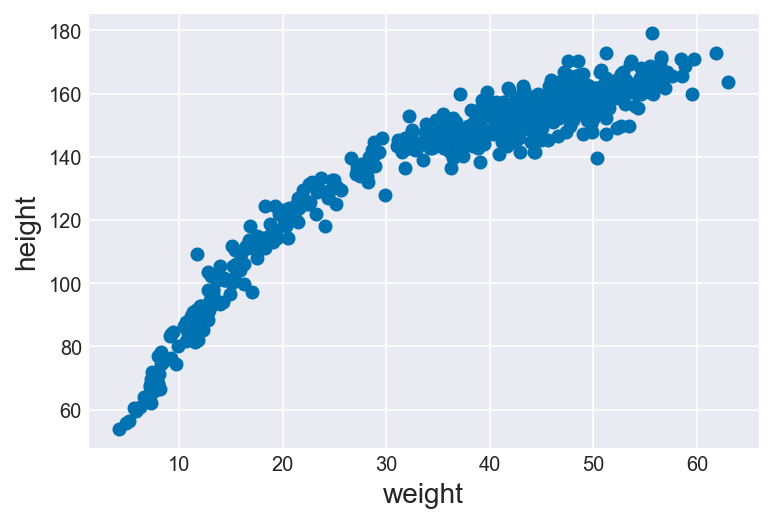

In [7]:
plt.scatter(d.weight, d.height)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14);

#### Code 4.65

In [8]:
d["weight_std"] = (d.weight - d.weight.mean()) / d.weight.std()
d["weight_std2"] = d.weight_std**2

In [9]:
with pm.Model() as m_4_5:
    alpha = pm.Normal('alpha', mu=178, sd=20)
    beta_1 = pm.Lognormal('beta_1', mu=0, sd=1)
    beta_2 = pm.Normal('beta_2', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta_1 * d.weight_std + beta_2 * d.weight_std2)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d.height)
    trace_4_5 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta_2, beta_1, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:05<00:00, 689.91draws/s]


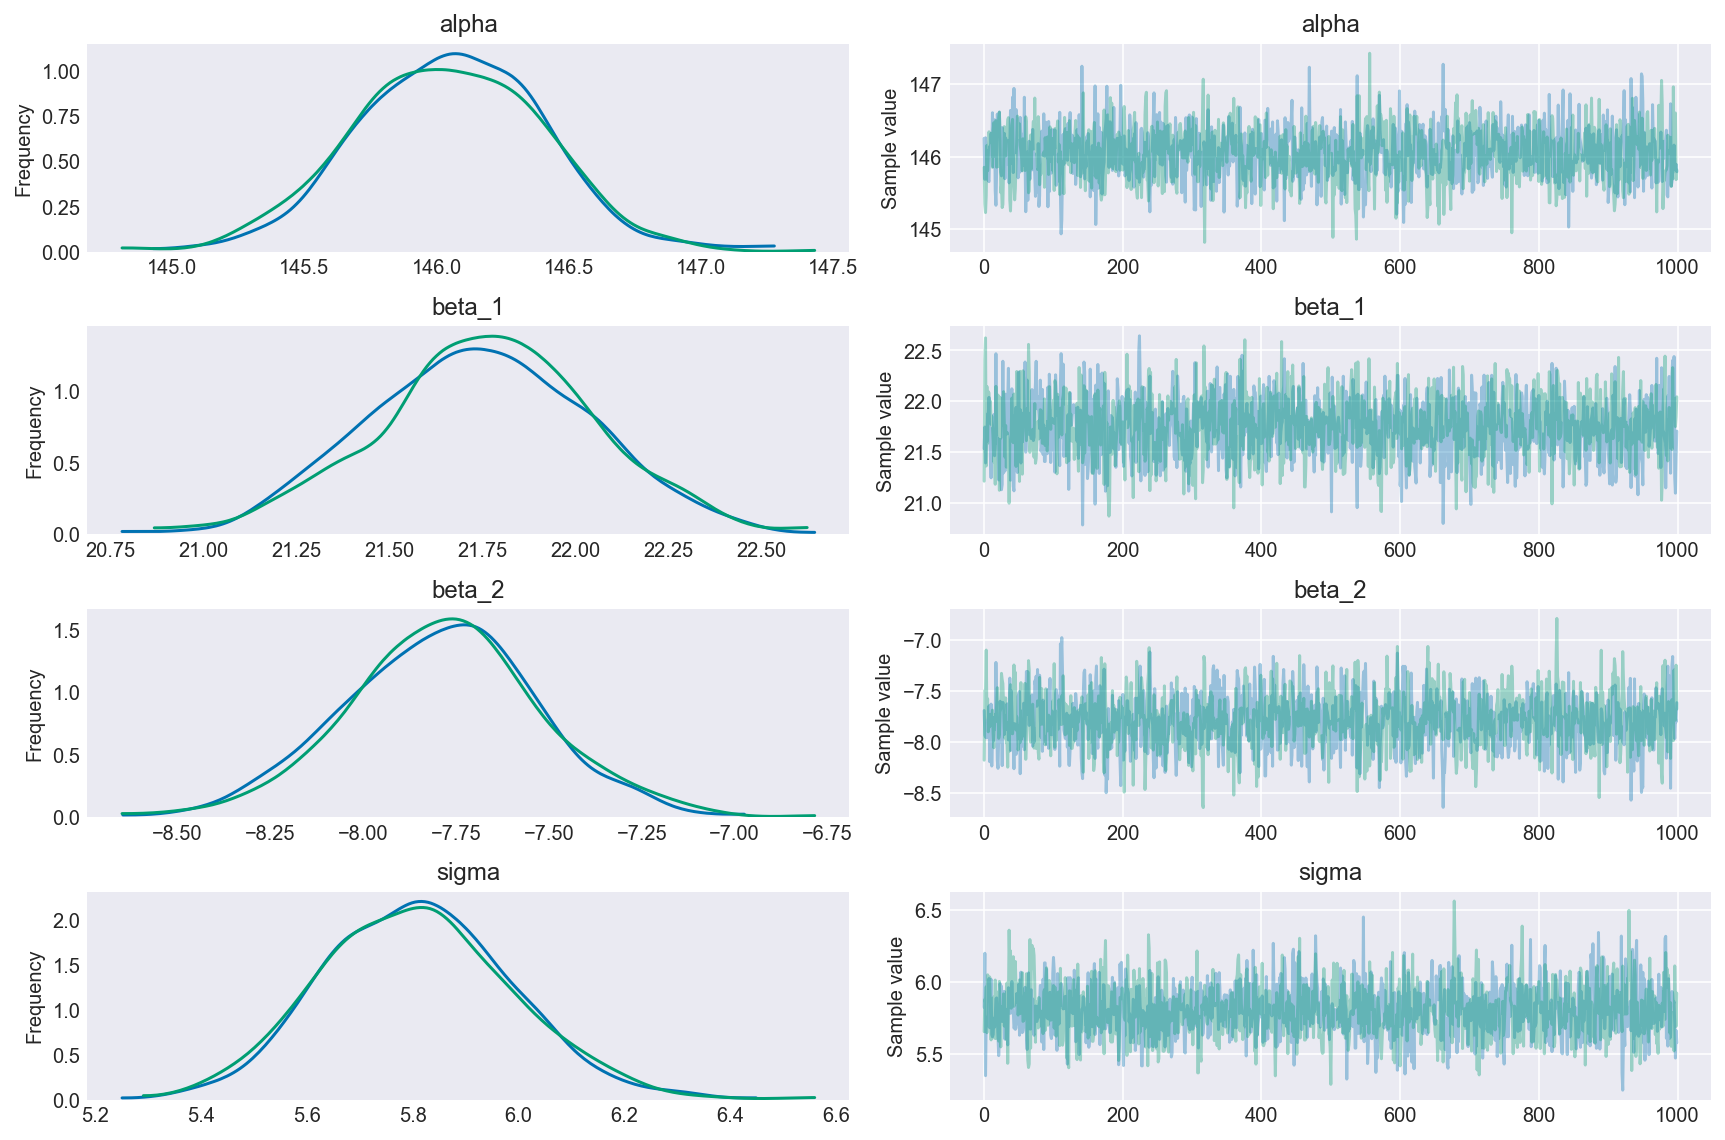

In [10]:
varnames = ['alpha', 'beta_1', 'beta_2', 'sigma']
pm.traceplot(trace_4_5, varnames);

#### Code 4.66

In [11]:
pm.summary(trace_4_5, varnames, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
alpha   146.04  0.35      0.01   145.49    146.58  1239.26   1.0
beta_1   21.75  0.29      0.01    21.26     22.21  1415.13   1.0
beta_2   -7.79  0.26      0.01    -8.20     -7.37  1205.63   1.0
sigma     5.81  0.18      0.00     5.53      6.09  1630.78   1.0

#### Code 4.67 (MCMC style)

In [14]:
mu_pred = trace_4_5['mu']
idx = np.argsort(d.weight_std)
mu_hpd = pm.hpd(mu_pred, alpha=.11)[idx]

height_pred = pm.sample_ppc(trace_4_5, 200, m_4_5)
height_pred_hpd = pm.hpd(height_pred['height'], alpha=.11)[idx]

/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """
100%|██████████| 200/200 [00:00<00:00, 682.10it/s]


#### Code 4.68

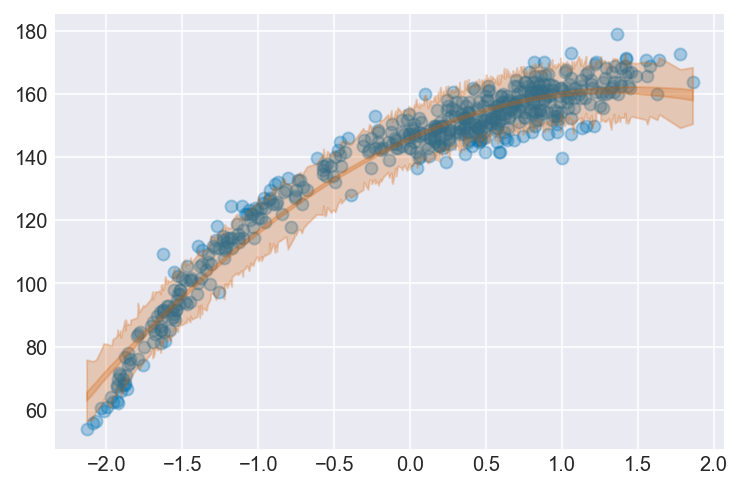

In [15]:
plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3)
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);
plt.fill_between(d.weight_std[idx], height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25);

#### Code 4.69

In [16]:
weight_m = np.vstack((d.weight_std, d.weight_std**2, d.weight_std**3))

In [23]:
with pm.Model() as m_4_6:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta_1 = pm.Lognormal('beta_1', mu=0, sd=1)
    beta_2 = pm.Normal('beta_2', mu=0, sd=1)
    beta_3 = pm.Normal('beta_3', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + pm.math.dot([beta_1,beta_2, beta_3], weight_m))
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d.height)
    trace_4_6 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta_3, beta_2, beta_1, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:07<00:00, 538.48draws/s]


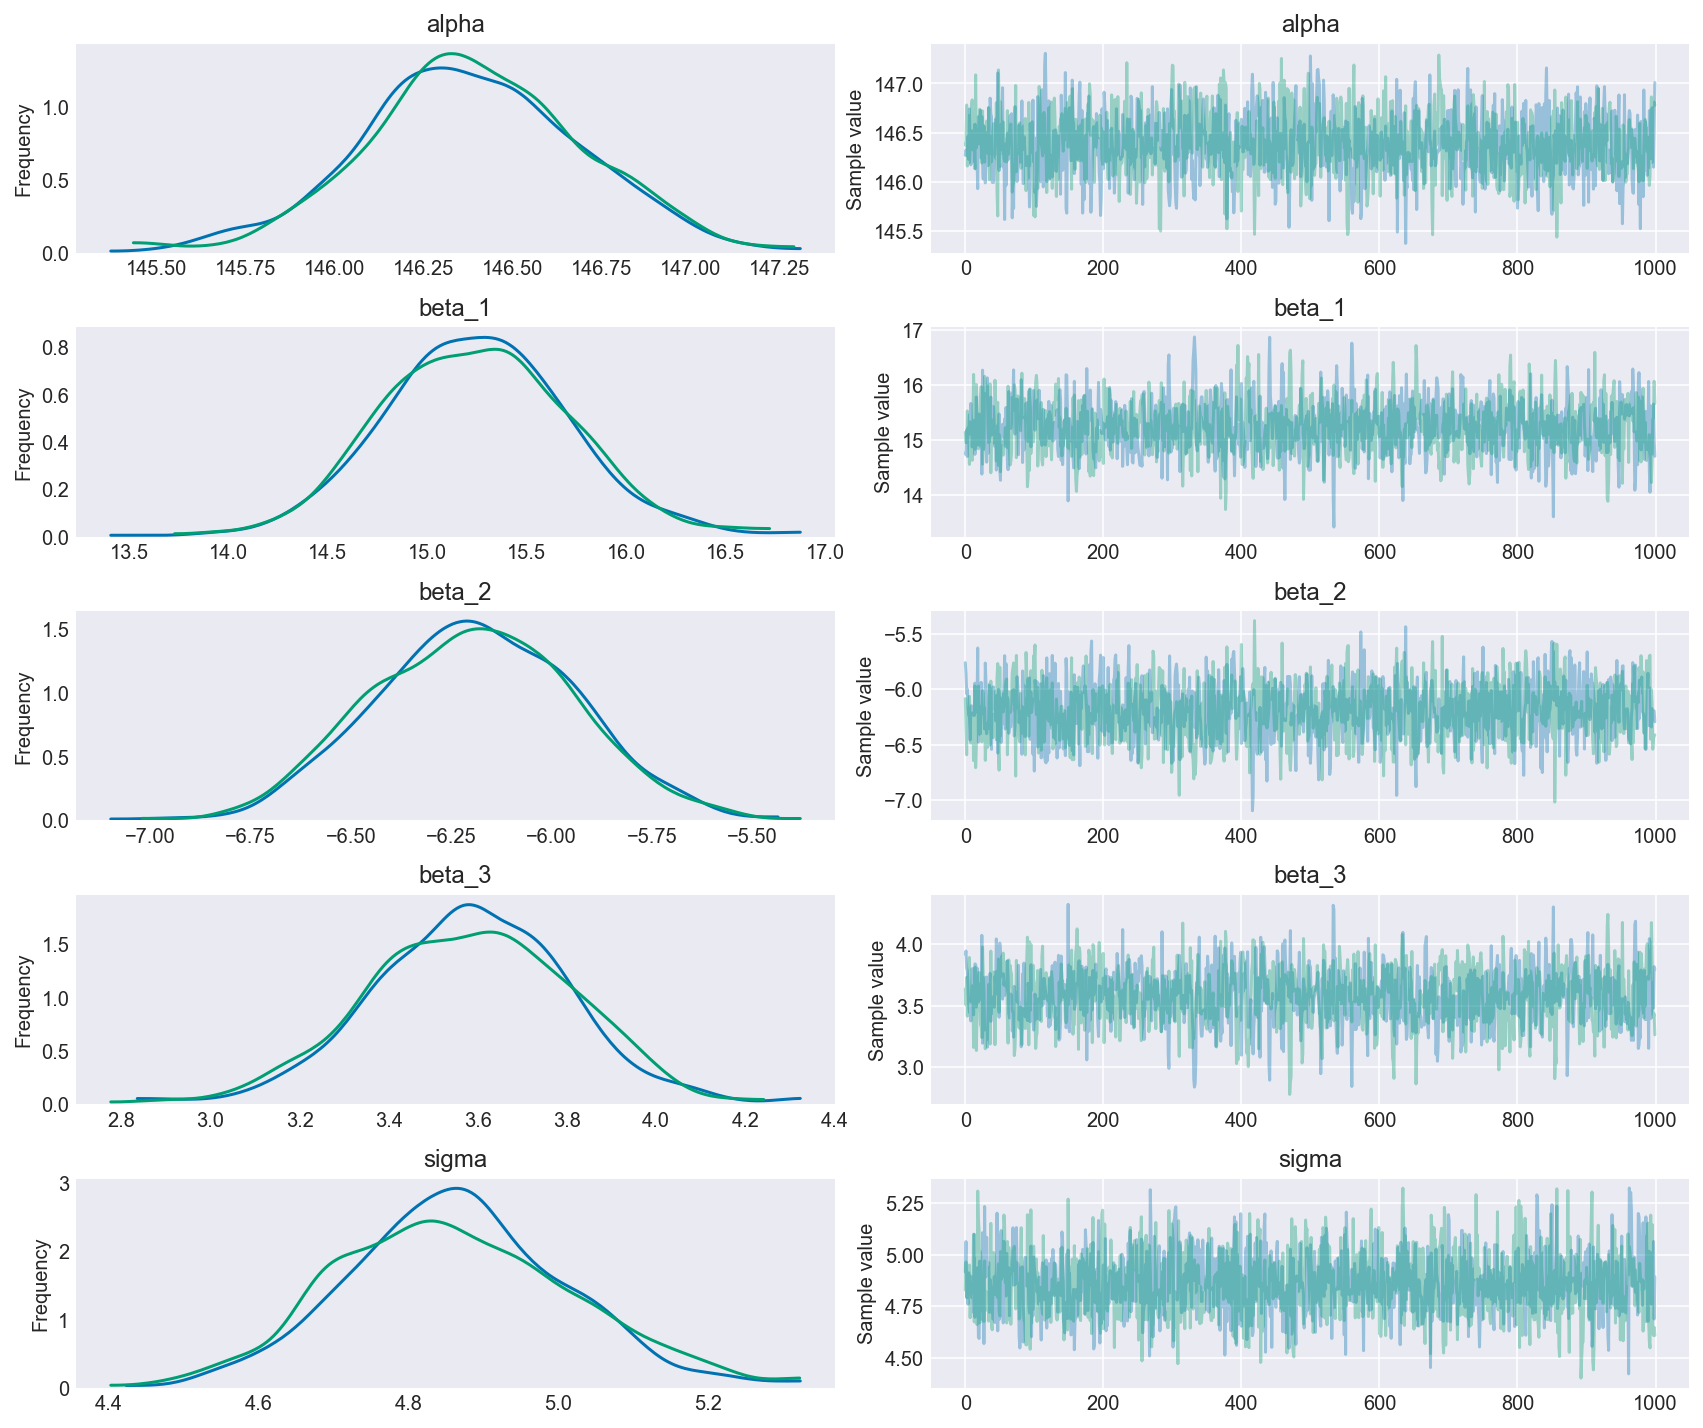

In [25]:
pm.traceplot(trace_4_6, ['alpha', 'beta_1', 'beta_2', 'beta_3', 'sigma']
);

/anaconda3/envs/stat-rethink-pymc3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """
100%|██████████| 200/200 [00:00<00:00, 889.63it/s]


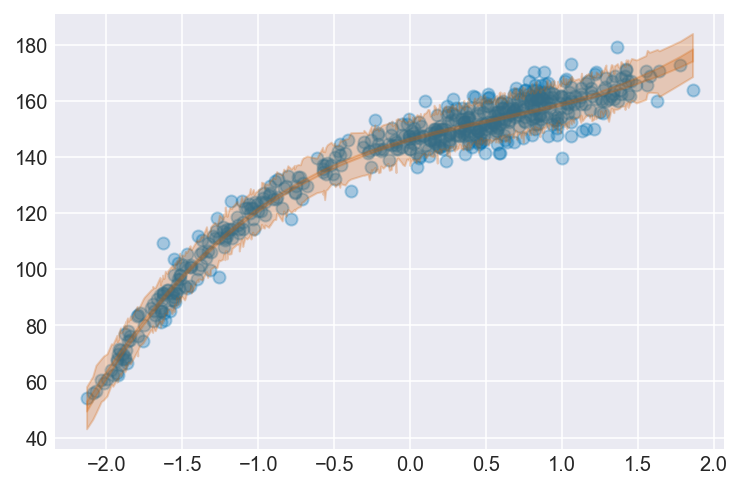

In [26]:
mu_pred_cube = trace_4_6['mu']
idx = np.argsort(d.weight_std)
mu_hpd_cube = pm.hpd(mu_pred_cube, alpha=.11)[idx]

height_pred_cube = pm.sample_ppc(trace_4_6, 200, m_4_6)
height_pred_hpd_cube = pm.hpd(height_pred_cube['height'], alpha=.11)[idx]

plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3)
plt.fill_between(d.weight_std[idx], mu_hpd_cube[:,0], mu_hpd_cube[:,1], color='C2', alpha=0.25);
plt.fill_between(d.weight_std[idx], height_pred_hpd_cube[:,0], height_pred_hpd_cube[:,1], color='C2', alpha=0.25);

#### Code 4.70 and 4.71

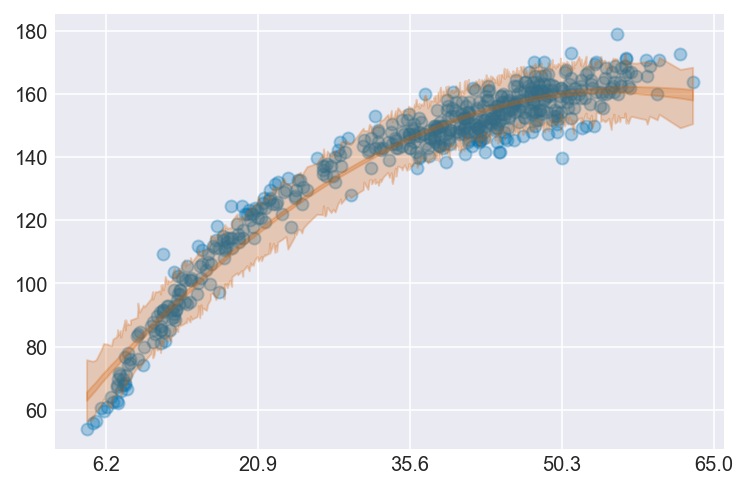

In [27]:
plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3)
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);
plt.fill_between(d.weight_std[idx], height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25)

at = np.arange(-2, 3)
plt.xticks(at, np.round(at * d.weight.std() + d.weight.mean(), 1));

### Splines

#### Code 4.72

In [3]:
d = pd.read_csv("Data/cherry_blossoms.csv", sep=";")

In [4]:
d.describe(percentiles=[0.055, 0.945]).round(2).transpose()

count     mean     std     min    5.5%      50%    94.5%      max
year        1215.0  1408.00  350.88  801.00  867.77  1408.00  1948.23  2015.00
doy          827.0   104.54    6.41   86.00   94.43   105.00   115.00   124.00
temp        1124.0     6.14    0.66    4.67    5.15     6.10     7.29     8.30
temp_upper  1124.0     7.19    0.99    5.45    5.90     7.04     8.90    12.10
temp_lower  1124.0     5.10    0.85    0.75    3.79     5.14     6.37     7.74

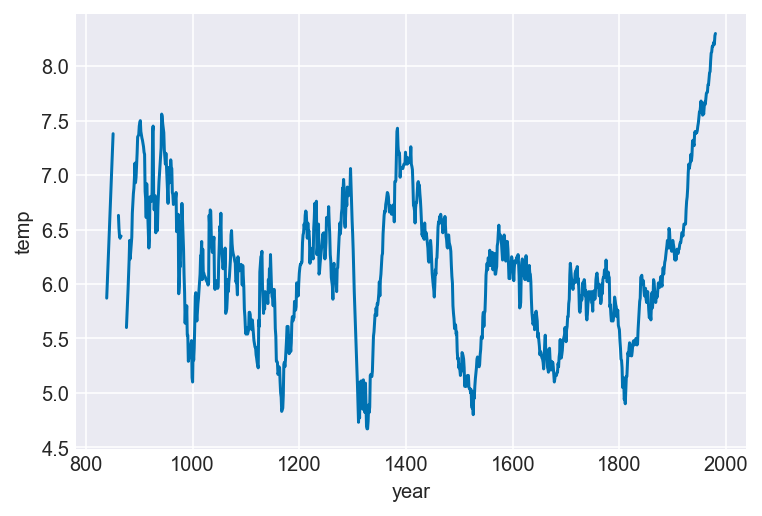

In [5]:
plt.plot(d.year, d.temp)
plt.xlabel("year")
plt.ylabel("temp");

#### Code 4.73

In [36]:
d2 = d[~d.temp.isna()]
num_knots = 15
knot_list = np.quantile(d2.year, q=np.linspace(0, 1, num_knots), interpolation="nearest")

In [37]:
knot_list

array([ 839,  937, 1017, 1098, 1178, 1258, 1338, 1419, 1499, 1579, 1659,
       1739, 1820, 1900, 1980])

In [45]:
k_tup = si.splrep(knot_list, np.linspace(0,1, num_knots), k=3)

In [46]:
list(k_tup)

[array([ 839.,  839.,  839.,  839., 1017., 1098., 1178., 1258., 1338.,
        1419., 1499., 1579., 1659., 1739., 1820., 1980., 1980., 1980.,
        1980.]),
 array([-1.29571408e-18,  3.27394751e-02,  1.15636602e-01,  2.13536965e-01,
         2.85855887e-01,  3.57025124e-01,  4.29200242e-01,  4.99378734e-01,
         5.71509216e-01,  6.42856536e-01,  7.14207498e-01,  7.86327007e-01,
         8.79855280e-01,  9.52778210e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]),
 3]

In [33]:
b = si.BSpline(knot_list, np.diag(np.ones(num_knots)), 3, extrapolate=False)

In [28]:
b(d2.year)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

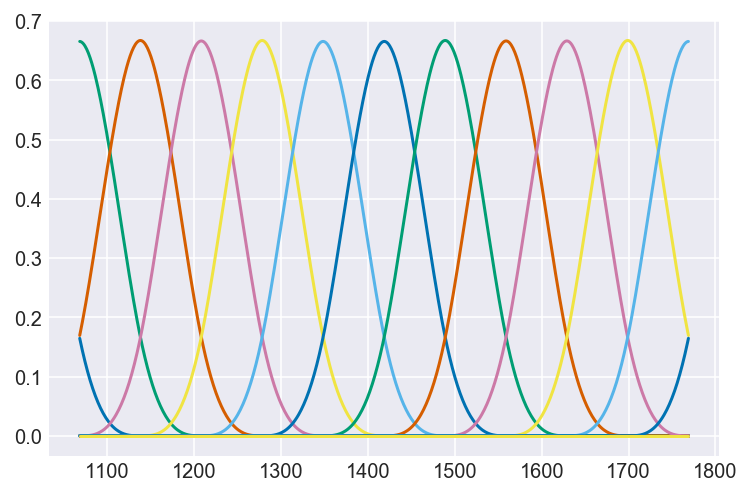

In [29]:
plt.plot(d2.year, b(d2.year));

In [78]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running debian buster/sid and using:
Python 3.7.0
IPython 6.5.0
PyMC3 3.5
NumPy 1.15.0
Pandas 0.23.4
SciPy 1.1.0
Matplotlib 2.2.3



/home/datauser/miniconda3/envs/pymc3_resources/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: dist() and linux_distribution() functions are deprecated in Python 3.5
  
